<a href="https://colab.research.google.com/github/MalejaM/ds4a/blob/master/Week3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# append the id to this REST command
file_download_link = '''https://docs.google.com/uc?export=download&id=''' + '1sjFUHKomeaUWD4IGSFv-9Oig9etMIqeH'

In [ ]:
!wget -O 'Saber_11__2019-1.csv' --no-check-certificate "$file_download_link"

--2020-06-20 14:47:26--  https://docs.google.com/uc?export=download&id=1sjFUHKomeaUWD4IGSFv-9Oig9etMIqeH
Resolving docs.google.com (docs.google.com)... 173.194.69.113, 173.194.69.100, 173.194.69.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3tsmrr3omuqr4res3v2eg95agoooavqt/1592664375000/06921392931107884550/*/1sjFUHKomeaUWD4IGSFv-9Oig9etMIqeH?e=download [following]
--2020-06-20 14:47:27--  https://doc-0s-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3tsmrr3omuqr4res3v2eg95agoooavqt/1592664375000/06921392931107884550/*/1sjFUHKomeaUWD4IGSFv-9Oig9etMIqeH?e=download
Resolving doc-0s-44-docs.googleusercontent.com (doc-0s-44-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0s-44-docs.googleusercontent.com (doc-0s-44-d

In [ ]:
!git clone https://github.com/chentinghao/download_google_drive.git

fatal: destination path 'download_google_drive' already exists and is not an empty directory.


In [ ]:
!python download_google_drive/download_gdrive.py '1_fk7zzf2UGsXjsz8sXeBITPeKkFQTTf5' 'Saber_11__2019-2.csv'

397MB [00:02, 148MB/s] 


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data={}
#data['20181']=pd.read_csv('Saber_11__2018-1.csv', encoding='utf-8', sep=',')
#data['20182']=pd.read_csv('Saber_11__2018-2.csv', encoding='utf-8', sep=',')
data['20191']=pd.read_csv('Saber_11__2019-1.csv', encoding='utf-8', sep=',', error_bad_lines=False)
data['20192']=pd.read_csv('Saber_11__2019-2.csv', encoding='utf-8', sep=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (76,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Concatenar los Datasets

In [ ]:
full=pd.concat([#data['20181'],data['20182'],
                data['20191'],data['20192']], sort=True)

In [ ]:
full.ESTU_PAIS_RESIDE.value_counts()

COLOMBIA                  565896
VENEZUELA                   1142
ESTADOS UNIDOS                70
ESPAÑA                        46
ECUADOR                       30
ARGENTINA                     10
MÉXICO                        10
BOLIVIA                        7
PERÚ                           7
ITALIA                         7
BRASIL                         7
FRANCIA                        7
CHILE                          7
CUBA                           6
COSTA RICA                     4
REINO UNIDO                    4
EL SALVADOR                    3
PAÍSES BAJOS - HOLANDA         3
ALEMANIA                       3
COMORAS                        3
CHINA                          2
PORTUGAL                       2
REPÚBLICA DOMINICANA           2
COREA DEL NORTE                2
ARUBA                          2
NAMIBIA                        1
VANUATU                        1
AFGANISTÁN                     1
PANAMÁ                         1
BÉLGICA                        1
SUIZA     

Validación de NAs

In [ ]:
nas=np.sum(full.isna(), axis=0)
nasperc=nas[nas!=0]/full.shape[0]

Eliminación de columnas no comunes

In [ ]:
col_no_comunes=list(nasperc[nasperc>0.4].index)
col_no_comunes

[]

In [ ]:
full=full.drop(columns=col_no_comunes)

In [ ]:
full.groupby('PERIODO').size()

PERIODO
20191     21083
20194    546212
dtype: int64

**Se deben excluir algunos individuos??**

**Hay distintios tipos de examen según la población??**

In [ ]:
full.describe()

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_C_NATURALES,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
count,567295.000000,5.672950e+05,5.672950e+05,567295.000000,567295.000000,567295.000000,567295.000000,567295.000000,567295.000000,567295.000000,567295.000000,567247.000000,567295.000000,567295.000000,567295.000000,567295.00000,567295.000000,567295.000000,567295.000000,567295.000000,567276.000000,567295.000000,567295.000000,567295.000000
mean,195331.487896,2.088907e+11,2.094468e+11,32.818491,33053.048913,2.036750,2.626801,2.452846,1.920858,32.785239,32999.928182,2.406137,50.171274,50.114773,50.126729,50.12601,50.193125,20193.888508,48.480397,247.501457,48.863158,52.371614,50.840286,46.521646
std,228307.567910,9.473532e+10,9.546011e+10,26.541080,26562.686743,0.772901,0.763408,0.759428,0.832658,26.602359,26626.357789,0.707315,28.933891,28.916369,28.956619,28.94543,28.910539,0.567492,10.952288,52.440962,13.020856,10.663824,12.175946,12.330779
min,75.000000,1.050010e+11,1.050010e+11,5.000000,5001.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5001.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,20191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45393.000000,1.190010e+11,1.190010e+11,11.000000,11001.000000,1.000000,2.000000,2.000000,1.000000,11.000000,11001.000000,2.000000,25.000000,25.000000,25.000000,25.00000,25.000000,20194.000000,40.000000,208.000000,39.000000,45.000000,42.000000,37.000000
50%,112128.000000,1.760010e+11,1.760010e+11,23.000000,23001.000000,2.000000,3.000000,3.000000,2.000000,20.000000,20400.000000,2.000000,50.000000,50.000000,50.000000,50.00000,50.000000,20194.000000,48.000000,244.000000,48.000000,53.000000,51.000000,45.000000
75%,193102.000000,3.080011e+11,3.080011e+11,54.000000,54001.000000,3.000000,3.000000,3.000000,3.000000,54.000000,54001.000000,3.000000,75.000000,75.000000,75.000000,75.00000,75.000000,20194.000000,56.000000,284.000000,57.000000,60.000000,59.000000,56.000000
max,728303.000000,8.548740e+11,8.548740e+11,99.000000,99773.000000,4.000000,4.000000,4.000000,4.000000,99.000000,99773.000000,4.000000,100.000000,100.000000,100.000000,100.00000,100.000000,20194.000000,100.000000,477.000000,100.000000,100.000000,100.000000,100.000000


### Imputación de NAs

In [ ]:
# Conversión de guiones a NAs
for i in full.columns:
    full.loc[full[i]=='-',i]=np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
sum(full.FAMI_NUMLIBROS.isna())

46414

In [ ]:
fullorig=full.copy()
nasorig=np.sum(full.isna(), axis=0)
nasperc=nasorig[nasorig!=0]/full.shape[0]*100

In [ ]:
nasperc

COLE_BILINGUE                    16.137283
COLE_CARACTER                     2.890736
ESTU_COD_RESIDE_DEPTO             0.069452
ESTU_COD_RESIDE_MCPIO             0.069452
ESTU_DEDICACIONINTERNET           6.051525
ESTU_DEDICACIONLECTURADIARIA      5.838761
ESTU_DEPTO_RESIDE                 0.069452
ESTU_ETNIA                       92.908099
ESTU_GENERO                       0.021329
ESTU_HORASSEMANATRABAJA           3.126768
ESTU_INSE_INDIVIDUAL              3.153738
ESTU_MCPIO_RESIDE                 0.069452
ESTU_NSE_ESTABLECIMIENTO          0.008461
ESTU_NSE_INDIVIDUAL               3.153738
ESTU_TIENEETNIA                   0.069452
ESTU_TIPOREMUNERACION             3.350990
FAMI_COMECARNEPESCADOHUEVO        5.983307
FAMI_COMECEREALFRUTOSLEGUMBRE     6.170687
FAMI_COMELECHEDERIVADOS           6.739175
FAMI_CUARTOSHOGAR                 3.174715
FAMI_EDUCACIONMADRE               5.586864
FAMI_EDUCACIONPADRE               5.618241
FAMI_ESTRATOVIVIENDA              6.333213
FAMI_NUMLIB

In [ ]:
for i in nasperc.index:
    print(i,full.loc[:,i].dtypes,full[i].unique())

COLE_BILINGUE object ['N' 'S' nan]
COLE_CARACTER object ['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' nan 'NO APLICA']
ESTU_COD_RESIDE_DEPTO object ['76' '11' '25' '68' '15' '66' '18' '08' '17' '20' '05' '81' '85' '19'
 '41' '52' '50' '94' '54' '73' '63' '13' nan '70' '47' '44' '23' '86' '27'
 '95' '99' '88' '97' '91' '99999']
ESTU_COD_RESIDE_MCPIO object ['76001' '11001' '25758' ... '68264' '25086' '27086']
ESTU_DEDICACIONINTERNET object ['Entre 1 y 3 horas' '30 minutos o menos' 'Más de 3 horas' nan
 'Entre 30 y 60 minutos' 'No Navega Internet']
ESTU_DEDICACIONLECTURADIARIA object ['Entre 1 y 2 horas' 'No leo por entretenimiento' 'Entre 30 y 60 minutos'
 nan '30 minutos o menos' 'Más de 2 horas']
ESTU_DEPTO_RESIDE object ['VALLE' 'BOGOTA' 'CUNDINAMARCA' 'SANTANDER' 'BOYACA' 'RISARALDA'
 'CAQUETA' 'ATLANTICO' 'CALDAS' 'CESAR' 'ANTIOQUIA' 'ARAUCA' 'CASANARE'
 'CAUCA' 'HUILA' 'NARIÑO' 'META' 'GUAINIA' 'NORTE SANTANDER' 'TOLIMA'
 'QUINDIO' 'BOLIVAR' nan 'SUCRE' 'MAGDALENA' 'LA GUAJIRA' 'CORD

#### Variables a Eliminar:
- ESTU_COD_RESIDE_DEPTO y ESTU_COD_RESIDE_MCPIO: SOn las mismas que ESTU_DEPTO_RESIDE y ESTU_MCPIO_RESIDE



#### Las que no aplican para imputación categórica:
ESTU_NSE_ESTABLECIMIENTO float64 [ 3.  4.  2.  1. nan]
ESTU_NSE_INDIVIDUAL object [3.0 2.0 4.0 nan 1.0 '4' '3' '2' '1']
ESTU_INSE_INDIVIDUAL (Arreglar)



#### Ordinales:
ESTU_DEDICACIONINTERNET

ESTU_DEDICACIONLECTURADIARIA

ESTU_HORASSEMANATRABAJA

FAMI_COMECARNEPESCADOHUEVO object ['3 a 5 veces por semana' 'Todos o casi todos los días'
 'Nunca o rara vez comemos eso' '1 o 2 veces por semana']
 
FAMI_COMECEREALFRUTOSLEGUMBRE object ['Todos o casi todos los días' 'Nunca o rara vez comemos eso' nan
 '3 a 5 veces por semana' '1 o 2 veces por semana']
 
FAMI_COMELECHEDERIVADOS object ['Todos o casi todos los días' '3 a 5 veces por semana'
 '1 o 2 veces por semana' nan 'Nunca o rara vez comemos eso']
 
FAMI_CUARTOSHOGAR object ['Cuatro' 'Dos' 'Tres' 'Cinco' nan 'Seis o mas' 'Uno']

FAMI_EDUCACIONMADRE object ['Secundaria (Bachillerato) completa' 'Educación profesional completa'
 'Postgrado' nan 'Técnica o tecnológica completa'
 'Educación profesional incompleta' 'No sabe'
 'Secundaria (Bachillerato) incompleta' 'Primaria incompleta'
 'Técnica o tecnológica incompleta' 'Primaria completa' 'Ninguno'
 'No Aplica']
 
FAMI_EDUCACIONPADRE object ['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Primaria incompleta' 'Educación profesional completa' 'Postgrado' nan
 'No sabe' 'No Aplica' 'Educación profesional incompleta'
 'Secundaria (Bachillerato) completa' 'Ninguno'
 'Secundaria (Bachillerato) incompleta' 'Primaria completa']
 
FAMI_ESTRATOVIVIENDA object ['Estrato 4' 'Estrato 3' 'Estrato 2' 'Estrato 6' 'Sin Estrato' nan
 'Estrato 5' 'Estrato 1']
 
FAMI_NUMLIBROS object ['0 A 10 LIBROS' '11 A 25 LIBROS' 'MÁS DE 100 LIBROS' nan
 '26 A 100 LIBROS']
 
FAMI_PERSONASHOGAR object ['3 a 4' '7 a 8' '5 a 6' '1 a 2' nan '9 o más']

FAMI_SITUACIONECONOMICA object ['Mejor' 'Igual' 'Peor' nan]

In [ ]:
# Eliminamos los que tienen NAs en las variables Target
full = full.loc[full.PERCENTIL_GLOBAL.notna(),:]
full = full.loc[full.PUNT_INGLES.notna(),:]

In [ ]:
# Categóricas con NAs
catnas=[i for i in nasperc.index if 'NSE' not in i]
for i in catnas:
    full.loc[full[i].isna(),i]='Sin Información'

In [ ]:
cols=[i for i in full.columns if 'FAMI_' in i]
full.loc[full.ESTU_NSE_ESTABLECIMIENTO.isna(),cols].tail(5)

,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE
489582,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información
504772,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información
518672,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información
521101,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información
529593,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información


In [ ]:
# Numéricas con NAs: Se imputan con la mediana, ya que no hay información adicional para inferir el NSE

# Arreglamos la variable numérica ya que tiene valores con 1 y 1.0, e imputamos con la mediana.
nse_arr=full.ESTU_NSE_INDIVIDUAL.apply(lambda x: str(x)[0])
nse_arr[nse_arr=='n']=-1
nse_arr=np.array(nse_arr.values, dtype='int8')
nse_arr[nse_arr==-1]=np.median(nse_arr[nse_arr!=-1])
full.loc[:,'ESTU_NSE_INDIVIDUAL']=nse_arr

In [ ]:
# Arreglamos Puntaje Inglés que debería ser numética
full.loc[:,'PUNT_INGLES']=full.loc[:,'PUNT_INGLES'].astype(int)

In [ ]:
# Imputación CON DUDAS, ya que son MUCHOS VALORES EN NA
full.loc[full.ESTU_INSE_INDIVIDUAL.isna(),'ESTU_INSE_INDIVIDUAL']=np.median(full.loc[full.ESTU_INSE_INDIVIDUAL.notna(),'ESTU_INSE_INDIVIDUAL'].astype('float'))

In [ ]:
# Imputación 3
full.loc[:,'ESTU_NSE_ESTABLECIMIENTO']=np.median(full.loc[full.ESTU_NSE_ESTABLECIMIENTO.notna(),'ESTU_NSE_ESTABLECIMIENTO'].astype(int))

In [ ]:
nas=np.sum(full.isna(), axis=0)
nasperc=nas[nas!=0]/full.shape[0]*100
nasperc

Series([], dtype: float64)

In [ ]:
# Conversión a categóricas ordenadas (Variables con NAs)

cats=['Sin Información','No Navega Internet','30 minutos o menos','Entre 30 y 60 minutos', 'Entre 1 y 3 horas','Más de 3 horas']
full.loc[:,'ESTU_DEDICACIONINTERNET']=pd.Categorical(full.ESTU_DEDICACIONINTERNET, categories=cats, ordered=True)

cats=['Sin Información', 'No Navega Internet','30 minutos o menos','Entre 30 y 60 minutos','Entre 1 y 3 horas',  'Más de 3 horas']
full.loc[:,'ESTU_DEDICACIONINTERNET']=pd.Categorical(full.ESTU_DEDICACIONINTERNET, categories=cats, ordered=True)

cats=['Sin Información', '0', 'Menos de 10 horas','Entre 11 y 20 horas', 'Entre 21 y 30 horas','Más de 30 horas']
full.loc[:,'ESTU_HORASSEMANATRABAJA']=pd.Categorical(full.ESTU_HORASSEMANATRABAJA, categories=cats, ordered=True)

cats=['Sin Información','No leo por entretenimiento','30 minutos o menos','Entre 30 y 60 minutos','Entre 1 y 2 horas','Más de 2 horas' ]
full.loc[:,'ESTU_DEDICACIONLECTURADIARIA']=pd.Categorical(full.ESTU_DEDICACIONLECTURADIARIA, categories=cats, ordered=True)

cats=['Sin Información','Nunca o rara vez comemos eso','1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días']
full.loc[:,'FAMI_COMECARNEPESCADOHUEVO']=pd.Categorical(full.FAMI_COMECARNEPESCADOHUEVO, categories=cats, ordered=True)
 
cats=['Sin Información','Nunca o rara vez comemos eso','1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días']
full.loc[:,'FAMI_COMECEREALFRUTOSLEGUMBRE']=pd.Categorical(full.FAMI_COMECEREALFRUTOSLEGUMBRE, categories=cats, ordered=True)

cats=['Sin Información','Nunca o rara vez comemos eso','1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días']
full.loc[:,'FAMI_COMELECHEDERIVADOS']=pd.Categorical(full.FAMI_COMELECHEDERIVADOS, categories=cats, ordered=True)
 
cats=['Sin Información', 'Uno','Dos', 'Tres','Cuatro', 'Cinco','Seis o mas' ]
full.loc[:,'FAMI_CUARTOSHOGAR']=pd.Categorical(full.FAMI_CUARTOSHOGAR, categories=cats, ordered=True)

cats=['Ninguno','Sin Información','No sabe','No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta','Educación profesional incompleta','Técnica o tecnológica completa', 'Educación profesional completa','Postgrado']
full.loc[:,'FAMI_EDUCACIONMADRE']=pd.Categorical(full.FAMI_EDUCACIONMADRE, categories=cats, ordered=True)
 
cats=['Ninguno','Sin Información','No sabe','No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta','Educación profesional incompleta','Técnica o tecnológica completa', 'Educación profesional completa','Postgrado']
full.loc[:,'FAMI_EDUCACIONPADRE']=pd.Categorical(full.FAMI_EDUCACIONPADRE, categories=cats, ordered=True)
 
cats=['Sin Estrato','Sin Información','Estrato 1', 'Estrato 2','Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
full.loc[:,'FAMI_ESTRATOVIVIENDA']=pd.Categorical(full.FAMI_ESTRATOVIVIENDA, categories=cats, ordered=True)
 
cats=['Sin Información','0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS']
full.loc[:,'FAMI_NUMLIBROS']=pd.Categorical(full.FAMI_NUMLIBROS, categories=cats, ordered=True)
 
cats=['Sin Información','1 a 2','3 a 4',  '5 a 6','7 a 8' ,'9 o más']
full.loc[:,'FAMI_PERSONASHOGAR']=pd.Categorical(full.FAMI_PERSONASHOGAR, categories=cats, ordered=True)

cats=['Sin Información', 'Peor','Igual','Mejor']
full.loc[:,'FAMI_SITUACIONECONOMICA']=pd.Categorical(full.FAMI_SITUACIONECONOMICA, categories=cats, ordered=True)


In [ ]:
# Conversión a categóricas ordenadas (Variables sin NAs)
nas=np.sum(fullorig.isna(), axis=0)
nasperc=nas[nas==0]/fullorig.shape[0]*100
for i in nasperc.index:
    print(i,full.loc[:,i].dtypes,full[i].unique())

COLE_AREA_UBICACION object ['URBANO' 'RURAL']
COLE_CALENDARIO object ['A' 'B' 'OTRO']
COLE_CODIGO_ICFES float64 [114686.  19364. 130732. ... 305334. 296202. 597468.]
COLE_COD_DANE_ESTABLECIMIENTO float64 [1.76001003e+11 3.11848001e+11 3.11001105e+11 ... 2.50330001e+11
 3.70670008e+11 3.11001110e+11]
COLE_COD_DANE_SEDE float64 [1.76001003e+11 3.11848001e+11 3.11001105e+11 ... 2.76111003e+11
 2.05756001e+11 2.05483000e+11]
COLE_COD_DEPTO_UBICACION float64 [76. 11. 68. 15. 66. 18.  8. 25. 17. 20.  5. 81. 85. 19. 52. 50. 94. 54.
 73. 41. 70. 47. 44. 13. 23. 86. 63. 27. 95. 88. 97. 99. 91.]
COLE_COD_MCPIO_UBICACION float64 [76001. 11001. 76892. ... 68502. 68264. 25086.]
COLE_DEPTO_UBICACION object ['VALLE' 'BOGOTA' 'SANTANDER' 'BOYACA' 'RISARALDA' 'CAQUETA' 'ATLANTICO'
 'CUNDINAMARCA' 'CALDAS' 'CESAR' 'ANTIOQUIA' 'ARAUCA' 'CASANARE' 'CAUCA'
 'NARIÑO' 'META' 'GUAINIA' 'NORTE SANTANDER' 'TOLIMA' 'HUILA' 'SUCRE'
 'MAGDALENA' 'LA GUAJIRA' 'BOLIVAR' 'CORDOBA' 'PUTUMAYO' 'QUINDIO' 'CHOCO'
 'GUAVI

Para eliminar también:
COLE_COD_DEPTO_UBICACION
COLE_COD_MCPIO_UBICACION

In [ ]:
# Eliminamos las variables Código que tienen ya equivalente en texto
full= full.drop(columns=['COLE_COD_DEPTO_UBICACION','COLE_COD_MCPIO_UBICACION','ESTU_COD_RESIDE_DEPTO','ESTU_COD_RESIDE_MCPIO','ESTU_COD_DEPTO_PRESENTACION',
 'ESTU_COD_MCPIO_PRESENTACION'])

#### Valores únicos por variable

In [ ]:
unicount=full.apply(lambda x: len(x.unique()))

In [ ]:
unival={}
for i in full.columns:
    unival[i]=full[i].unique()

In [ ]:
unival['FAMI_COMECEREALFRUTOSLEGUMBRE']

[Todos o casi todos los días, Nunca o rara vez comemos eso, Sin Información, 3 a 5 veces por semana, 1 o 2 veces por semana]
Categories (5, object): [Sin Información < Nunca o rara vez comemos eso < 1 o 2 veces por semana <
                         3 a 5 veces por semana < Todos o casi todos los días]

#### Variables sin varianza

In [ ]:
[unicount[i] for i in np.where(unicount==1)]

[ESTU_ESTUDIANTE             1
 ESTU_NSE_ESTABLECIMIENTO    1
 dtype: int64]

In [ ]:
unicount[unicount/full.shape[0]==1]

ESTU_CONSECUTIVO    567276
dtype: int64

In [ ]:
full= full.drop(columns=['ESTU_ESTUDIANTE',
 'ESTU_NSE_ESTABLECIMIENTO','ESTU_CONSECUTIVO'])

### Conversión de códigos a categóricas

In [ ]:
for i in ['DESEMP_C_NATURALES',
 'DESEMP_LECTURA_CRITICA',
 'DESEMP_MATEMATICAS',
 'DESEMP_SOCIALES_CIUDADANAS','COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_COD_DANE_SEDE','COLE_CODIGO_ICFES',
 'PERIODO']:
    full.loc[:,i]=full.loc[:,i].apply(str)

### Identificación de variables numéricas y categóricas

In [ ]:
numvars=list(full.columns[full.dtypes!=object])
numvars

['ESTU_DEDICACIONINTERNET',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_NSE_INDIVIDUAL',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_NUMLIBROS',
 'FAMI_PERSONASHOGAR',
 'FAMI_SITUACIONECONOMICA',
 'PERCENTIL_C_NATURALES',
 'PERCENTIL_INGLES',
 'PERCENTIL_LECTURA_CRITICA',
 'PERCENTIL_MATEMATICAS',
 'PERCENTIL_SOCIALES_CIUDADANAS',
 'PUNT_C_NATURALES',
 'PUNT_GLOBAL',
 'PUNT_INGLES',
 'PUNT_LECTURA_CRITICA',
 'PUNT_MATEMATICAS',
 'PUNT_SOCIALES_CIUDADANAS']

In [ ]:
catvars=list(full.columns[full.dtypes==object])
catvars

['COLE_AREA_UBICACION',
 'COLE_BILINGUE',
 'COLE_CALENDARIO',
 'COLE_CARACTER',
 'COLE_CODIGO_ICFES',
 'COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_COD_DANE_SEDE',
 'COLE_DEPTO_UBICACION',
 'COLE_GENERO',
 'COLE_JORNADA',
 'COLE_MCPIO_UBICACION',
 'COLE_NATURALEZA',
 'COLE_NOMBRE_ESTABLECIMIENTO',
 'COLE_NOMBRE_SEDE',
 'COLE_SEDE_PRINCIPAL',
 'DESEMP_C_NATURALES',
 'DESEMP_INGLES',
 'DESEMP_LECTURA_CRITICA',
 'DESEMP_MATEMATICAS',
 'DESEMP_SOCIALES_CIUDADANAS',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_DEPTO_RESIDE',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_ETNIA',
 'ESTU_FECHANACIMIENTO',
 'ESTU_GENERACION-E',
 'ESTU_GENERO',
 'ESTU_INSE_INDIVIDUAL',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_MCPIO_RESIDE',
 'ESTU_NACIONALIDAD',
 'ESTU_PAIS_RESIDE',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_TIENEETNIA',
 'ESTU_TIPODOCUMENTO',
 'ESTU_TIPOREMUNERACION',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENE

In [ ]:
import seaborn as sns
def barras(variable):
    countvar=pd.DataFrame(full[variable].value_counts()).reset_index(drop=False)
    countvar.loc[:,'index']=pd.Categorical(countvar['index'])
    print(countvar)
    sns.barplot(data=countvar,y='index',x=variable, )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Si lo siguiente da muy alto, no graficar

In [ ]:
unicount['COLE_CODIGO_ICFES']

13702

             index  FAMI_TIENEINTERNET
0               Si              331282
1               No              203656
2  Sin Información               32338


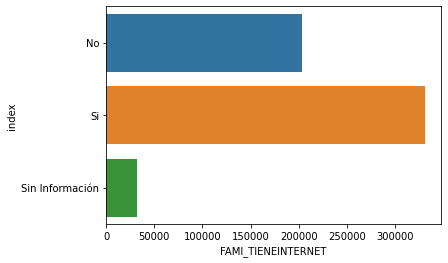

In [ ]:
barras('FAMI_TIENEINTERNET')

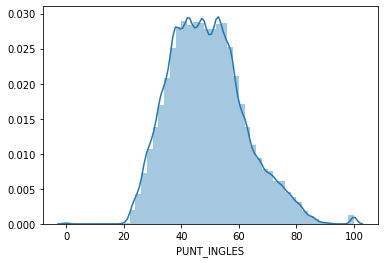

In [ ]:
sns.distplot(full['PUNT_INGLES'])

In [ ]:
# TAMAÑO DEL DATASET TRAS LA LIMPIEZA
full.shape

(567276, 73)

In [ ]:
full.describe()

,ESTU_NSE_INDIVIDUAL,PERCENTIL_C_NATURALES,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
count,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000,567276.000000
mean,2.369656,50.172394,50.116345,50.127869,50.127280,50.193895,48.480858,247.503869,48.863158,52.372168,50.840880,46.521972
std,0.869038,28.933485,28.915557,28.956274,28.944949,28.910360,10.952065,52.439482,13.020856,10.663262,12.175616,12.330718
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,25.000000,25.000000,25.000000,25.000000,40.000000,208.000000,39.000000,45.000000,42.000000,37.000000
50%,2.000000,50.000000,50.000000,50.000000,50.000000,50.000000,48.000000,244.000000,48.000000,53.000000,51.000000,45.000000
75%,3.000000,75.000000,75.000000,75.000000,75.000000,75.000000,56.000000,284.000000,57.000000,60.000000,59.000000,56.000000
max,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,477.000000,100.000000,100.000000,100.000000,100.000000


    index  COLE_AREA_UBICACION
0  URBANO               479352
1   RURAL                87924


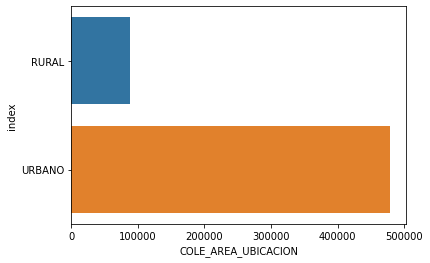

             index  COLE_BILINGUE
0                N         466623
1  Sin Información          91535
2                S           9118


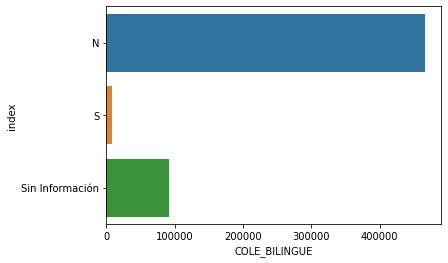

  index  COLE_CALENDARIO
0     A           548249
1     B            14462
2  OTRO             4565


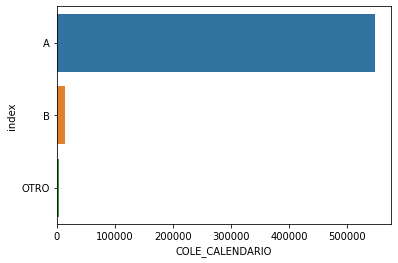

               index  COLE_CARACTER
0          ACADÉMICO         299908
1  TÉCNICO/ACADÉMICO         183048
2            TÉCNICO          60753
3    Sin Información          16399
4          NO APLICA           7168


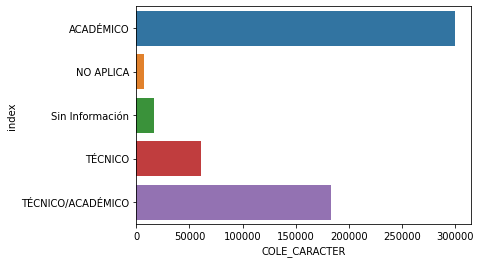

              index  COLE_DEPTO_UBICACION
0            BOGOTÁ                 82832
1         ANTIOQUIA                 75923
2             VALLE                 46050
3      CUNDINAMARCA                 38456
4         ATLANTICO                 33010
5         SANTANDER                 26165
6           BOLIVAR                 25705
7           CORDOBA                 20028
8            NARIÑO                 17731
9            BOYACA                 16885
10        MAGDALENA                 16681
11           TOLIMA                 16476
12  NORTE SANTANDER                 16095
13            CAUCA                 14844
14            HUILA                 14260
15            CESAR                 13526
16             META                 12760
17        RISARALDA                 11016
18            SUCRE                 10959
19           CALDAS                 10707
20       LA GUAJIRA                  8885
21          QUINDIO                  6511
22         CASANARE               

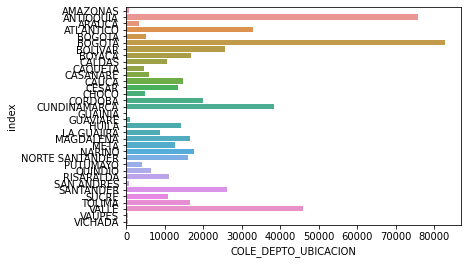

       index  COLE_GENERO
0      MIXTO       548211
1   FEMENINO        14639
2  MASCULINO         4426


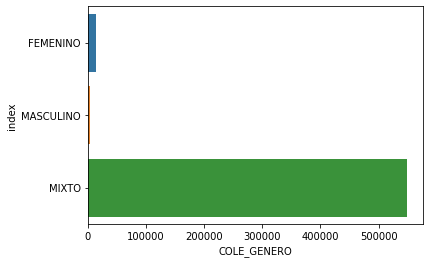

      index  COLE_JORNADA
0    MAÑANA        263285
1  COMPLETA         98152
2     UNICA         67479
3     TARDE         59667
4  SABATINA         42319
5     NOCHE         36374


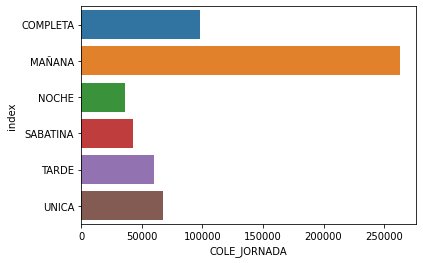

        index  COLE_NATURALEZA
0     OFICIAL           416851
1  NO OFICIAL           150425


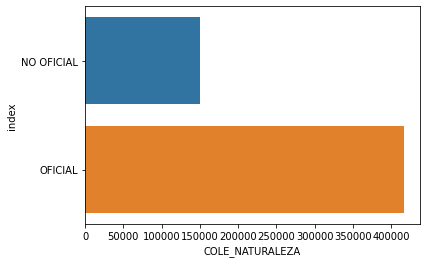

  index  COLE_SEDE_PRINCIPAL
0     S               544326
1     N                22950


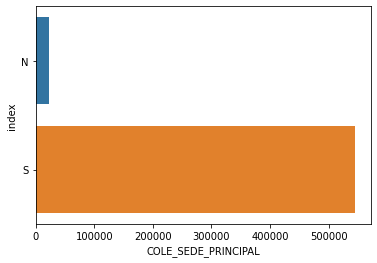

  index  DESEMP_C_NATURALES
0   2.0              272569
1   1.0              144411
2   3.0              135319
3   4.0               14977


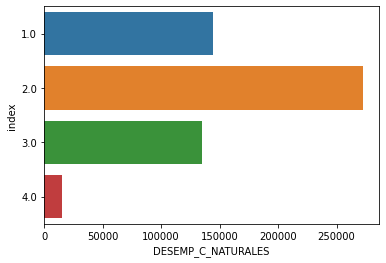

  index  DESEMP_INGLES
0    A-         277323
1    A1         156779
2    A2          82439
3    B1          38814
4    B+          11921


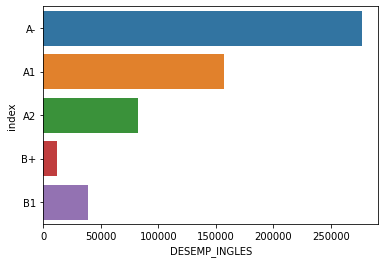

  index  DESEMP_LECTURA_CRITICA
0   3.0                  259107
1   2.0                  209221
2   4.0                   65143
3   1.0                   33805


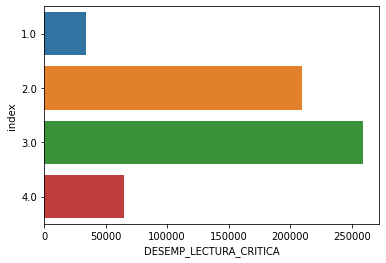

  index  DESEMP_MATEMATICAS
0   3.0              259594
1   2.0              214387
2   1.0               63092
3   4.0               30203


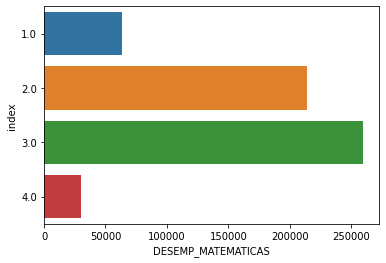

  index  DESEMP_SOCIALES_CIUDADANAS
0   2.0                      221488
1   1.0                      203847
2   3.0                      124919
3   4.0                       17022


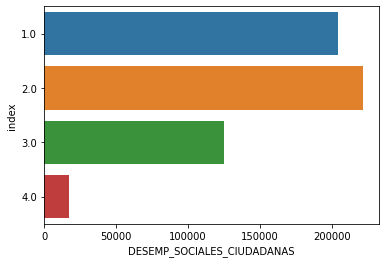

              index  ESTU_DEPTO_PRESENTACION
0            BOGOTÁ                    84122
1         ANTIOQUIA                    76134
2             VALLE                    46280
3      CUNDINAMARCA                    36048
4         ATLANTICO                    33610
5         SANTANDER                    26010
6           BOLIVAR                    24478
7           CORDOBA                    19949
8            NARIÑO                    17833
9            BOYACA                    17322
10        MAGDALENA                    16819
11           TOLIMA                    16217
12  NORTE SANTANDER                    16144
13            CAUCA                    14599
14            HUILA                    14385
15            CESAR                    13692
16             META                    12723
17           CALDAS                    11239
18            SUCRE                    10977
19        RISARALDA                    10723
20       LA GUAJIRA                     8889
21        

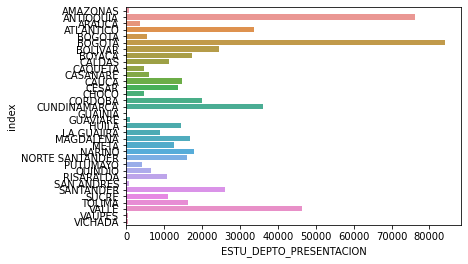

              index  ESTU_DEPTO_RESIDE
0            BOGOTÁ              83600
1         ANTIOQUIA              75989
2             VALLE              46049
3      CUNDINAMARCA              37363
4         ATLANTICO              32954
5         SANTANDER              25820
6           BOLIVAR              25516
7           CORDOBA              20082
8            NARIÑO              17707
9            BOYACA              16913
10        MAGDALENA              16753
11           TOLIMA              16586
12  NORTE SANTANDER              15947
13            CAUCA              14856
14            HUILA              14285
15            CESAR              13536
16             META              12684
17            SUCRE              10962
18        RISARALDA              10956
19           CALDAS              10776
20       LA GUAJIRA               8888
21          QUINDIO               6465
22         CASANARE               6019
23           BOGOTA               5311
24            CHOCO      

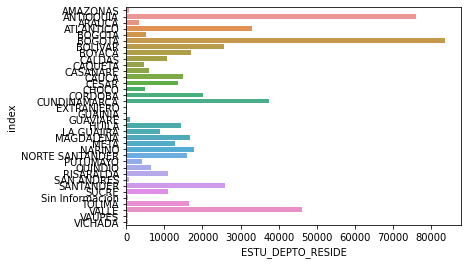

                                    index  ESTU_ESTADOINVESTIGACION
0                                PUBLICAR                    566728
1                VALIDEZ OFICINA JURÍDICA                       276
2  NO SE COMPROBO IDENTIDAD DEL EXAMINADO                       272


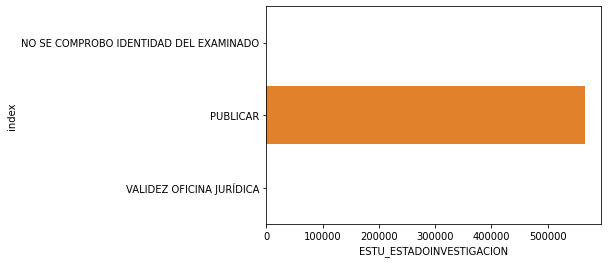

                            index  ESTU_ETNIA
0                 Sin Información      527062
1      Comunidad afrodescendiente       19651
2                         Ninguno        4486
3                            Zenú        3284
4   Otro grupo étnico minoritario        3191
5                           Wayúu        2696
6                            Paez        1879
7                           Pasto        1539
8                          Emberá        1155
9                           Pijao         703
10                         Raizal         384
11                        Sikuani         267
12                           Inga         224
13                      Guambiano         172
14                       Cancuamo         156
15                          Cubeo         117
16                        Arhuaco          97
17                        Huitoto          92
18                     Palenquero          74
19                         Tucano          33
20      Comunidades Rom (Gitanas) 

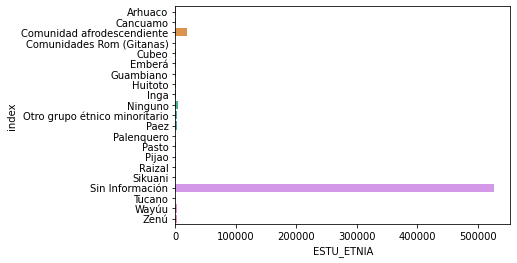

                                     index  ESTU_GENERACION-E
0                 GENERACION E - GRATUIDAD             297342
1                                       NO             264045
2       GENERACION E - EXCELENCIA NACIONAL               5703
3  GENERACION E - EXCELENCIA DEPARTAMENTAL                186


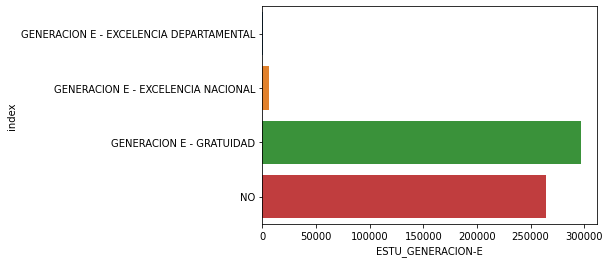

             index  ESTU_GENERO
0                F       306438
1                M       260717
2  Sin Información          121


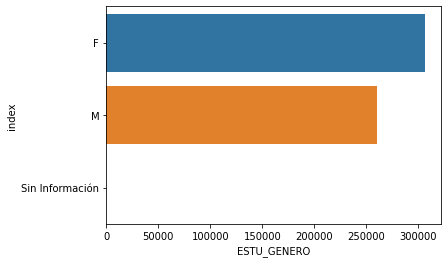

                     index  ESTU_NACIONALIDAD
0                 COLOMBIA             565877
1                VENEZUELA               1142
2           ESTADOS UNIDOS                 70
3                   ESPAÑA                 46
4                  ECUADOR                 30
5                ARGENTINA                 10
6                   MÉXICO                 10
7                  BOLIVIA                  7
8                     PERÚ                  7
9                   ITALIA                  7
10                  BRASIL                  7
11                 FRANCIA                  7
12                   CHILE                  7
13                    CUBA                  6
14              COSTA RICA                  4
15             REINO UNIDO                  4
16             EL SALVADOR                  3
17  PAÍSES BAJOS - HOLANDA                  3
18                ALEMANIA                  3
19                 COMORAS                  3
20                   CHINA        

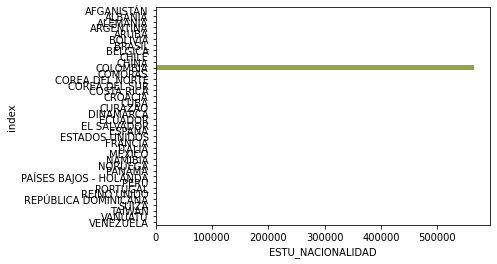

                     index  ESTU_PAIS_RESIDE
0                 COLOMBIA            565877
1                VENEZUELA              1142
2           ESTADOS UNIDOS                70
3                   ESPAÑA                46
4                  ECUADOR                30
5                ARGENTINA                10
6                   MÉXICO                10
7                  BOLIVIA                 7
8                     PERÚ                 7
9                   ITALIA                 7
10                  BRASIL                 7
11                 FRANCIA                 7
12                   CHILE                 7
13                    CUBA                 6
14              COSTA RICA                 4
15             REINO UNIDO                 4
16             EL SALVADOR                 3
17  PAÍSES BAJOS - HOLANDA                 3
18                ALEMANIA                 3
19                 COMORAS                 3
20                   CHINA                 2
21        

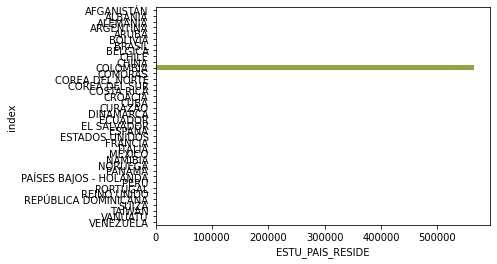

  index  ESTU_PRIVADO_LIBERTAD
0     N                 567141
1     S                    135


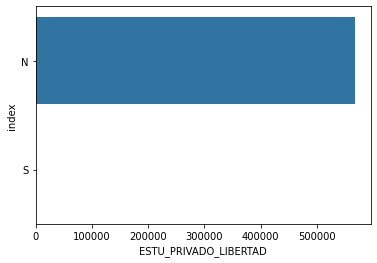

             index  ESTU_TIENEETNIA
0               No           526918
1               Si            39964
2  Sin Información              394


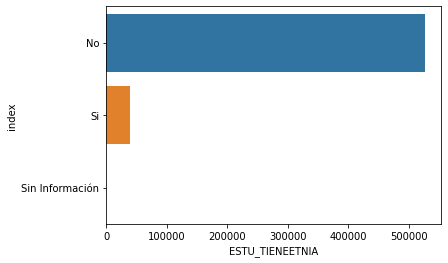

  index  ESTU_TIPODOCUMENTO
0    TI              460439
1    CC               97849
2    CR                6453
3    CE                1345
4   NES                 826
5   PEP                 237
6    PE                 111
7    PC                   7
8    RC                   5
9   CCB                   4


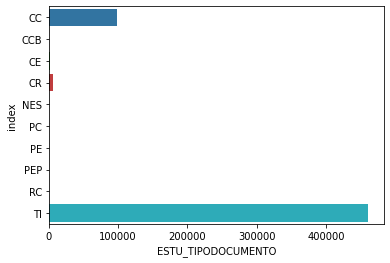

                       index  ESTU_TIPOREMUNERACION
0                         No                 392057
1            Si, en efectivo                 139745
2            Sin Información                  19006
3             Si, en especie                   8821
4  Si, en efectivo y especie                   7647


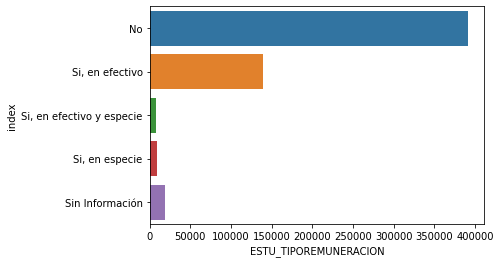

             index  FAMI_TIENEAUTOMOVIL
0               No               409298
1               Si               138983
2  Sin Información                18995


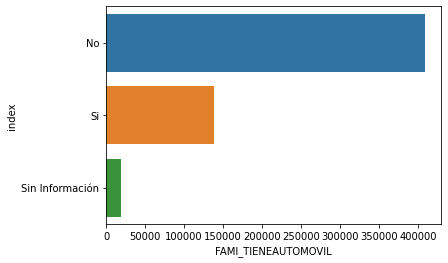

             index  FAMI_TIENECOMPUTADOR
0               Si                312199
1               No                237257
2  Sin Información                 17820


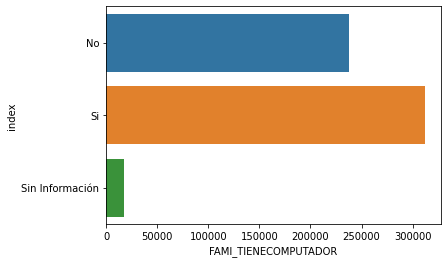

             index  FAMI_TIENECONSOLAVIDEOJUEGOS
0               No                        420096
1               Si                        128184
2  Sin Información                         18996


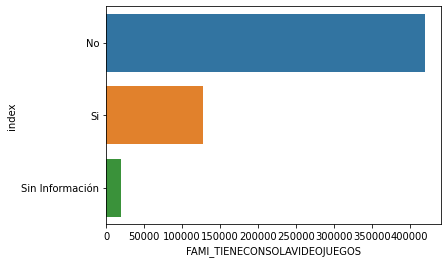

             index  FAMI_TIENEHORNOMICROOGAS
0               No                    285993
1               Si                    262840
2  Sin Información                     18443


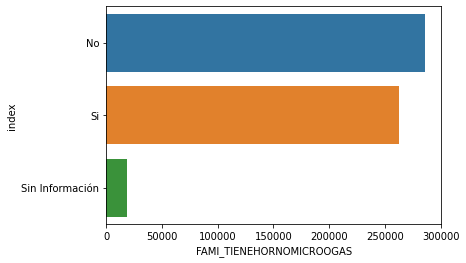

             index  FAMI_TIENEINTERNET
0               Si              331282
1               No              203656
2  Sin Información               32338


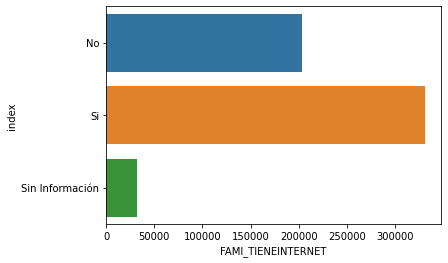

             index  FAMI_TIENELAVADORA
0               Si              423746
1               No              125910
2  Sin Información               17620


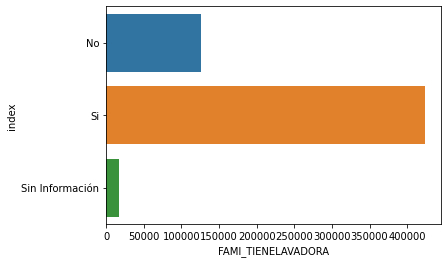

             index  FAMI_TIENEMOTOCICLETA
0               No                 321991
1               Si                 227294
2  Sin Información                  17991


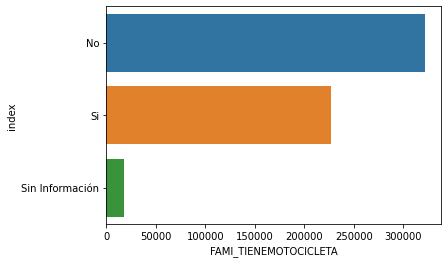

             index  FAMI_TIENESERVICIOTV
0               Si                408991
1               No                124959
2  Sin Información                 33326


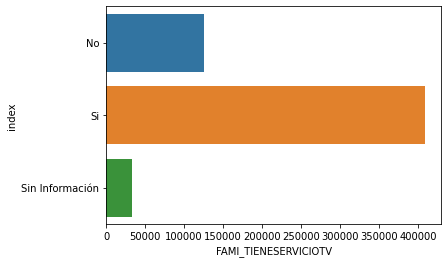

                                                index  FAMI_TRABAJOLABORMADRE
0           Trabaja en el hogar, no trabaja o estudia                  218918
1   Es dueño de un negocio pequeño (tiene pocos em...                   49919
2   Trabaja como personal de limpieza, mantenimien...                   47816
3   Trabaja como profesional (por ejemplo médico, ...                   46792
4   Tiene un trabajo de tipo auxiliar administrati...                   46303
5        Es vendedor o trabaja en atención al público                   41680
6                                           No aplica                   28249
7                                     Sin Información                   18350
8                 Es agricultor, pesquero o jornalero                   17272
9   Trabaja por cuenta propia (por ejemplo plomero...                   17169
10                                            No sabe                   12088
11  Es dueño de un negocio grande, tiene un cargo ...           

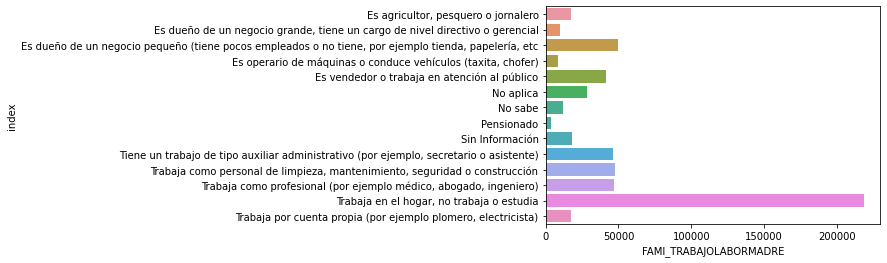

                                                index  FAMI_TRABAJOLABORPADRE
0                 Es agricultor, pesquero o jornalero                   79150
1   Trabaja por cuenta propia (por ejemplo plomero...                   62582
2   Es operario de máquinas o conduce vehículos (t...                   58335
3                                           No aplica                   50548
4   Trabaja como profesional (por ejemplo médico, ...                   46404
5   Es dueño de un negocio pequeño (tiene pocos em...                   45933
6                                             No sabe                   45616
7   Trabaja como personal de limpieza, mantenimien...                   40691
8           Trabaja en el hogar, no trabaja o estudia                   34076
9        Es vendedor o trabaja en atención al público                   32396
10  Tiene un trabajo de tipo auxiliar administrati...                   23335
11                                    Sin Información           

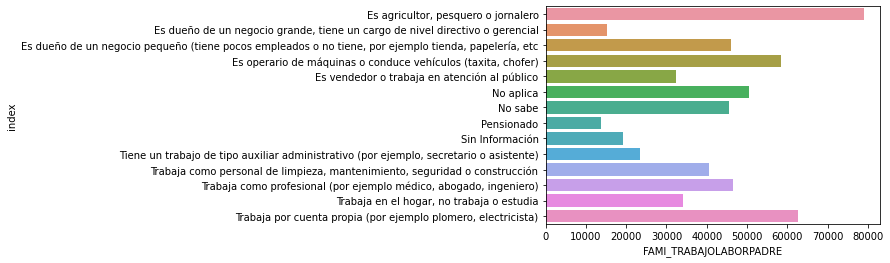

     index  PERIODO
0  20194.0   546193
1  20191.0    21083


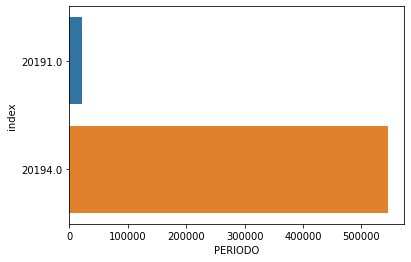

In [ ]:
import matplotlib. pyplot as plt
for i in catvars:
    if(unicount[i]<100):
        barras(i)
        plt.show()

### Variables con poca variabilidad

In [ ]:
variations2 = []
wordList=full.columns.difference(['y', 'per'])
i = 0
sizeofList = len(wordList) 
while i < sizeofList :

        df2                          = full[[wordList[i]]]
        kstable                      = pd.DataFrame()
        kstable['n_cat']             = df2.groupby([wordList[i]]).size() 
        index                        = len(df2.index)
        kstable['Vari']              = wordList[i]
        kstable['Porc']              = (kstable['n_cat']/index)* 100
        kstablefin                   = pd.DataFrame()
        kstablefin                   = kstable.groupby(['Vari']).max()  
        i += 1
        variations2.append(kstablefin)
appended_data2 = pd.concat(variations2)
appended_data2.drop('n_cat', axis=1, inplace=True)
res=appended_data2>95
x=res[res['Porc']==True]
y=x.index.values.tolist()
full.drop(y, axis=1, inplace=True)
y

['COLE_CALENDARIO',
 'COLE_GENERO',
 'COLE_SEDE_PRINCIPAL',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_NACIONALIDAD',
 'ESTU_PAIS_RESIDE',
 'ESTU_PRIVADO_LIBERTAD',
 'PERIODO']

In [ ]:
appended_data2
appended_data2.reset_index(drop=False, inplace=True)
appended_data2
select= appended_data2.loc[appended_data2['Porc'] > 95]
select

,Vari,Porc
2,COLE_CALENDARIO,96.645901
8,COLE_GENERO,96.639202
14,COLE_SEDE_PRINCIPAL,95.954350
24,ESTU_ESTADOINVESTIGACION,99.903398
33,ESTU_NACIONALIDAD,99.753383
35,ESTU_PAIS_RESIDE,99.753383
36,ESTU_PRIVADO_LIBERTAD,99.976202
66,PERIODO,96.283467


A pesar de su poca variabilidad, no se eliminarán ninguna de las variables por ser de interés para el análisis.

### Creación de nuevas variables

In [ ]:
# Variable Edad
full['ESTU_FECHANACIMIENTO2'] = pd.to_datetime(full['ESTU_FECHANACIMIENTO'], errors = 'coerce')
full['year'] = pd.DatetimeIndex(full['ESTU_FECHANACIMIENTO2']).year
full['month'] = pd.DatetimeIndex(full['ESTU_FECHANACIMIENTO2']).month
full['day'] = pd.DatetimeIndex(full['ESTU_FECHANACIMIENTO2']).day
full['naci'] =pd.to_datetime(full[['year', 'month', 'day']])
full['hoy']=np.datetime64('today', 'D')
full['edad']=full['hoy']-full['naci'] 
full['edad']=full['edad']/np.timedelta64(1,'Y')
full.drop(['ESTU_FECHANACIMIENTO2', 'year', 'month', 'day', 'naci', 'hoy','ESTU_FECHANACIMIENTO'],axis=1, inplace=True)

### Correlaciones

In [ ]:
# Veamos primero correlaciones para las numéricas y las ordinales
full2=full.loc[:,numvars]

In [ ]:
for i in full2.columns[full2.dtypes=='category']:
    full2.loc[:,i]=full2.loc[:,i].cat.codes

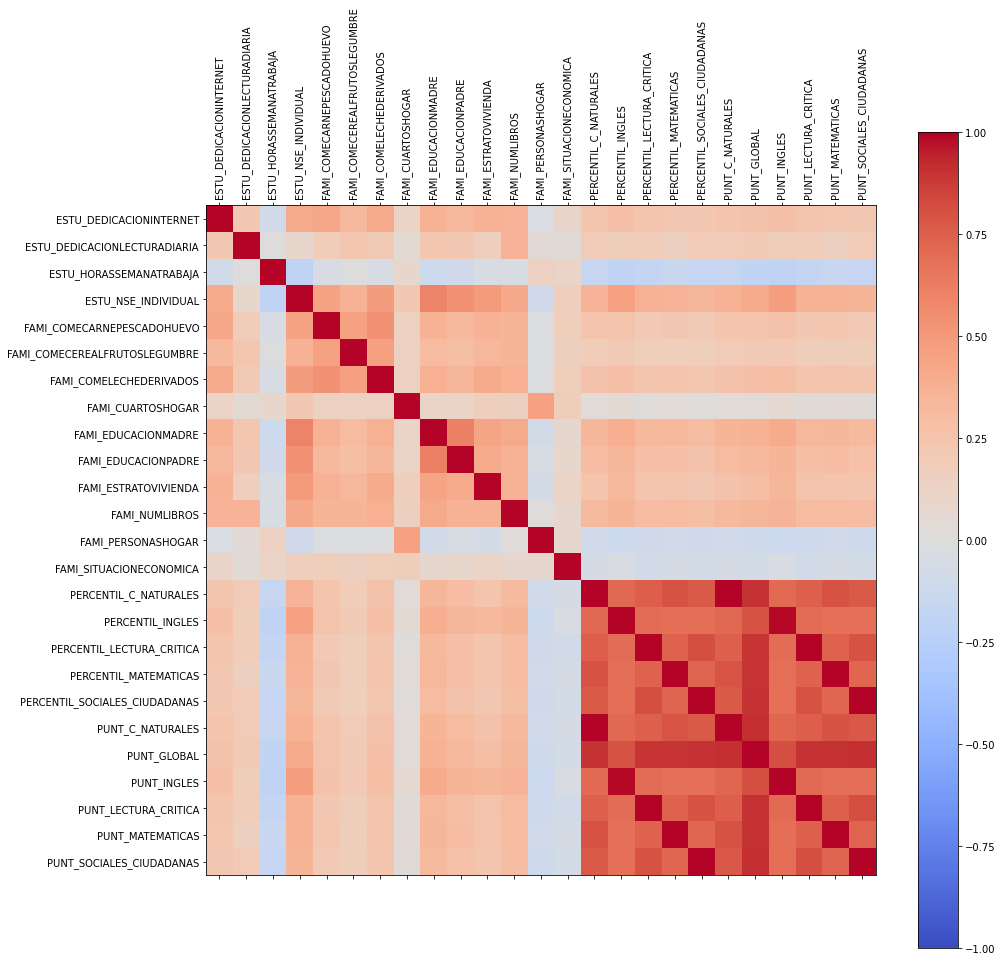

In [ ]:
corr = full2.corr(method='spearman')
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(full2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(full2.columns)
ax.set_yticklabels(full2.columns)
plt.show()

In [ ]:
catvars=list(full.columns[full.dtypes==object])
catvars

['COLE_AREA_UBICACION',
 'COLE_BILINGUE',
 'COLE_CARACTER',
 'COLE_CODIGO_ICFES',
 'COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_COD_DANE_SEDE',
 'COLE_DEPTO_UBICACION',
 'COLE_JORNADA',
 'COLE_MCPIO_UBICACION',
 'COLE_NATURALEZA',
 'COLE_NOMBRE_ESTABLECIMIENTO',
 'COLE_NOMBRE_SEDE',
 'DESEMP_C_NATURALES',
 'DESEMP_INGLES',
 'DESEMP_LECTURA_CRITICA',
 'DESEMP_MATEMATICAS',
 'DESEMP_SOCIALES_CIUDADANAS',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_DEPTO_RESIDE',
 'ESTU_ETNIA',
 'ESTU_GENERACION-E',
 'ESTU_GENERO',
 'ESTU_INSE_INDIVIDUAL',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_MCPIO_RESIDE',
 'ESTU_TIENEETNIA',
 'ESTU_TIPODOCUMENTO',
 'ESTU_TIPOREMUNERACION',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'PERCENTIL_GLOBAL']

In [ ]:
full3=full.loc[:,catvars]

In [ ]:
!pip install dython

In [ ]:
full4=full.copy()

In [ ]:
for i in full4.columns[full4.dtypes=='category']:
    full4.loc[:,i]=full4.loc[:,i].cat.codes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


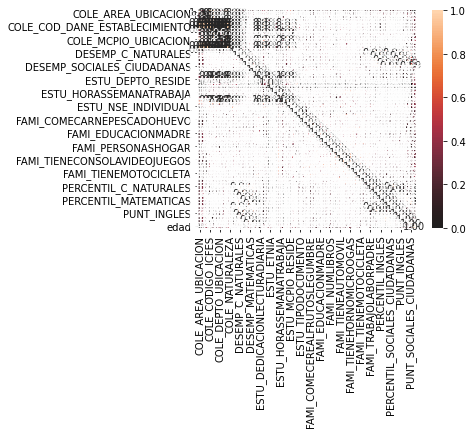

In [ ]:
# Tomamos los primeros registros únicamente por limitaciones de cómputo
from dython import nominal
a=nominal.associations(full4.iloc[0:5000,:], nominal_columns=list(full4.columns))

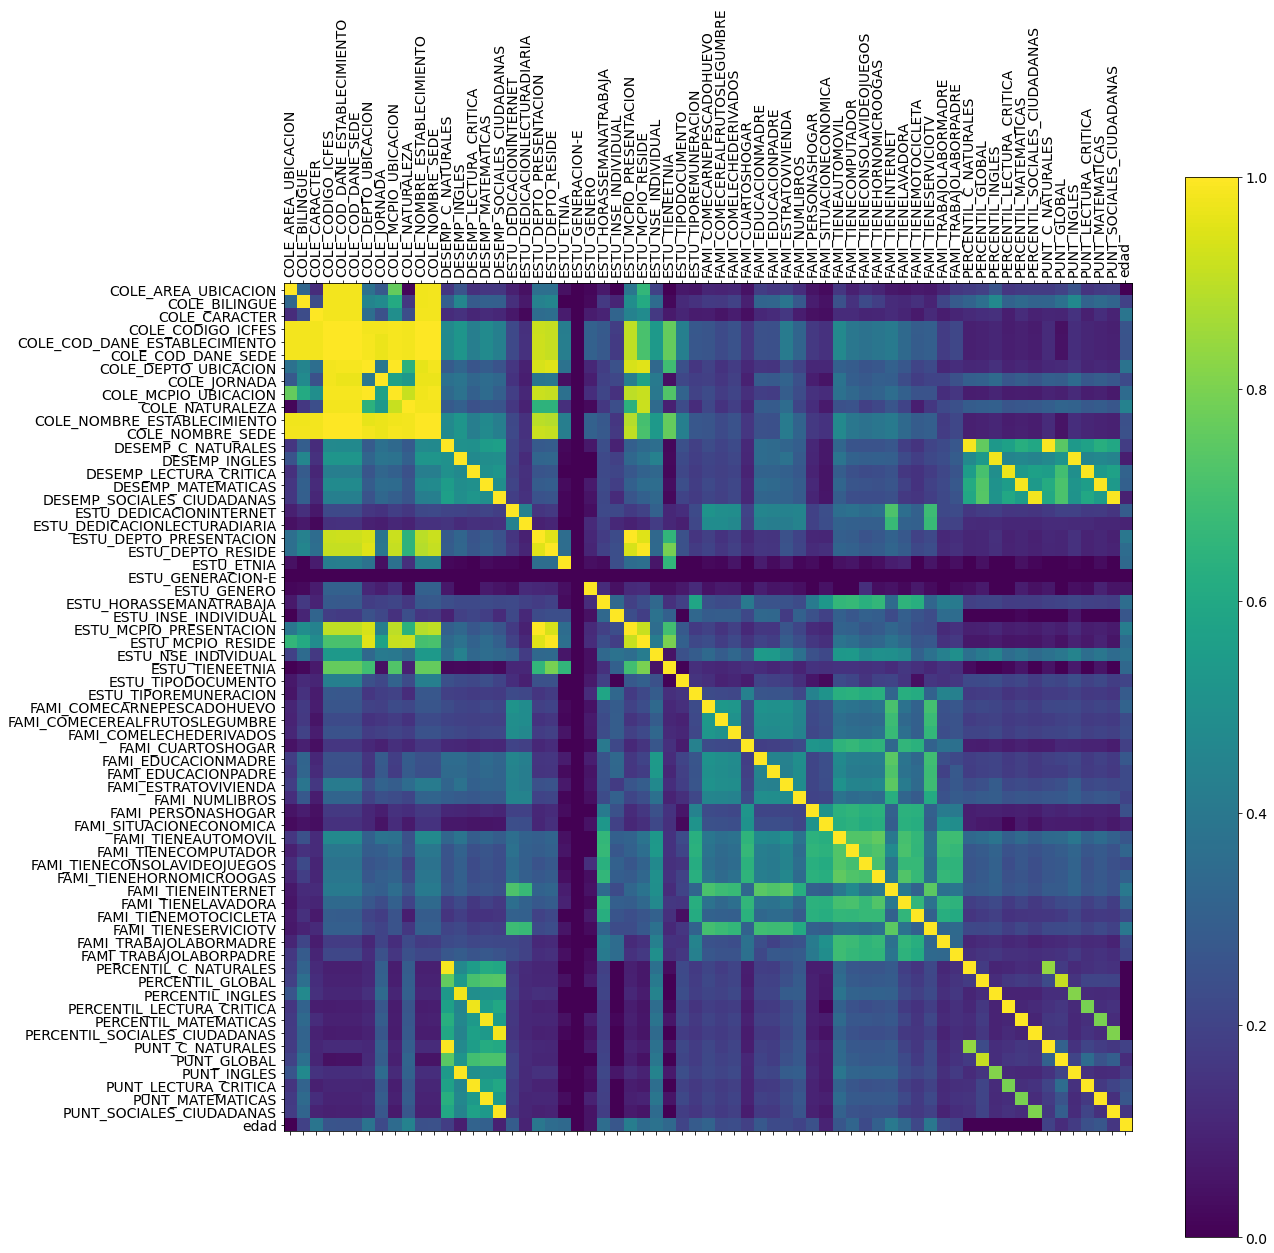

In [ ]:
f = plt.figure(figsize=(19, 19))
plt.matshow(a['corr'], fignum=f.number)
plt.xticks(range(full4.shape[1]), full4.columns, fontsize=14, rotation=90)
plt.yticks(range(full4.shape[1]), full4.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
categories=full4.apply(lambda x: len(x.unique()))
categories[categories>50].index

Index(['COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_MCPIO_UBICACION',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE',
       'PERCENTIL_C_NATURALES', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES',
       'PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS',
       'PERCENTIL_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_GLOBAL',
       'PUNT_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS', 'edad'],
      dtype='object')

In [ ]:
full5=full4.drop(columns=['COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_MCPIO_UBICACION',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE',
       'PERCENTIL_C_NATURALES', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES',
       'PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS',
       'PERCENTIL_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES',
       'PUNT_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
       'PUNT_SOCIALES_CIUDADANAS'])

In [ ]:
full5['PUNT_GLOBAL']=full4['PUNT_GLOBAL']

In [ ]:
varcats=list(full5.columns[full5.dtypes=='object'])
varcats

['COLE_AREA_UBICACION',
 'COLE_BILINGUE',
 'COLE_CARACTER',
 'COLE_DEPTO_UBICACION',
 'COLE_JORNADA',
 'COLE_NATURALEZA',
 'DESEMP_C_NATURALES',
 'DESEMP_INGLES',
 'DESEMP_LECTURA_CRITICA',
 'DESEMP_MATEMATICAS',
 'DESEMP_SOCIALES_CIUDADANAS',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_DEPTO_RESIDE',
 'ESTU_ETNIA',
 'ESTU_GENERACION-E',
 'ESTU_GENERO',
 'ESTU_TIENEETNIA',
 'ESTU_TIPODOCUMENTO',
 'ESTU_TIPOREMUNERACION',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TRABAJOLABORPADRE']

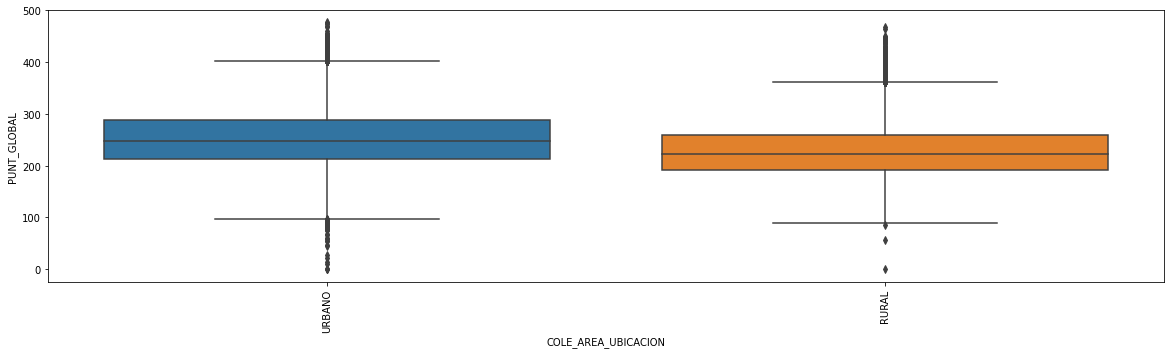

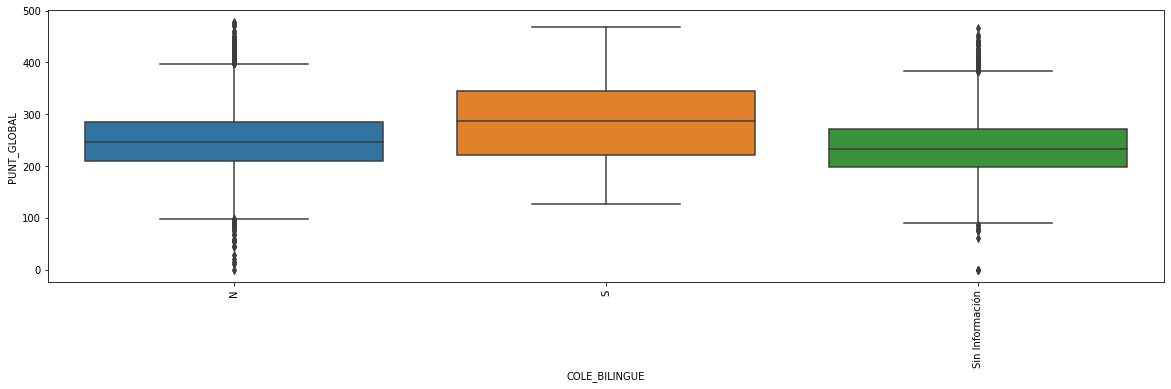

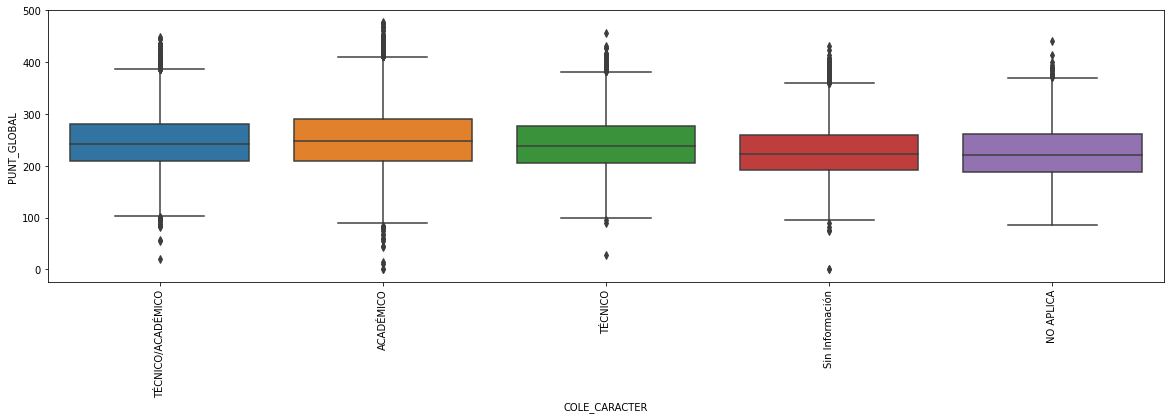

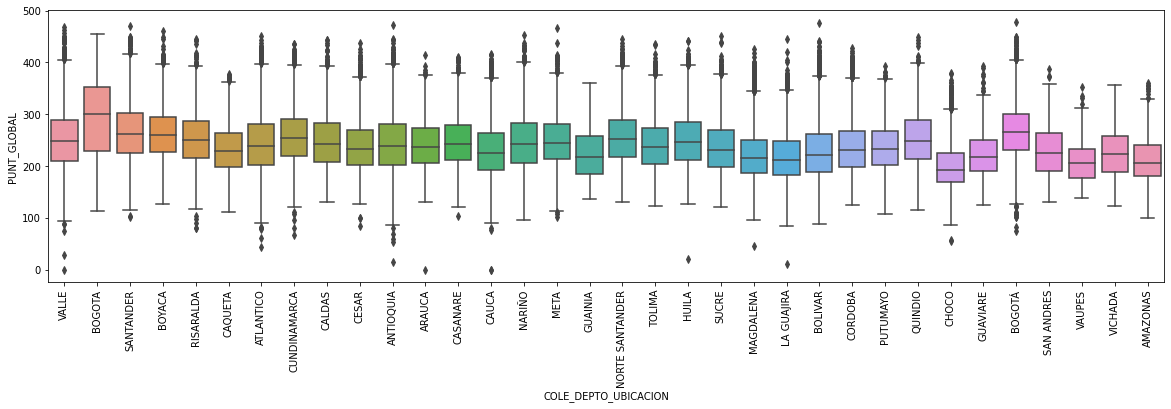

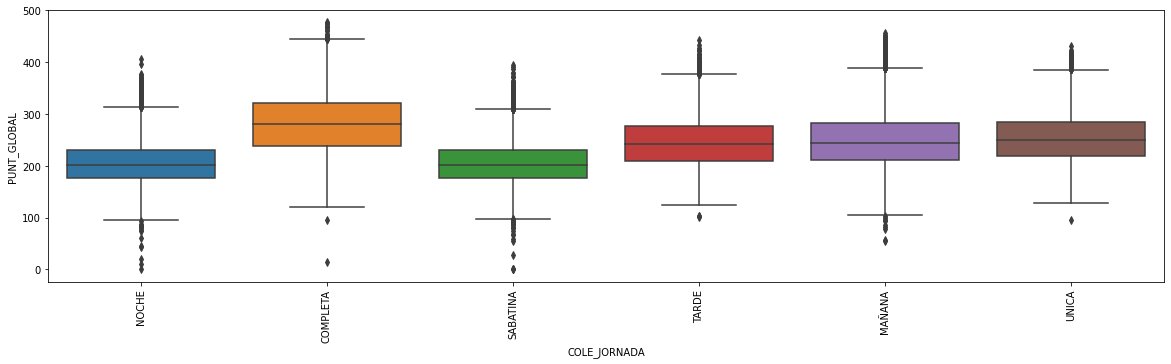

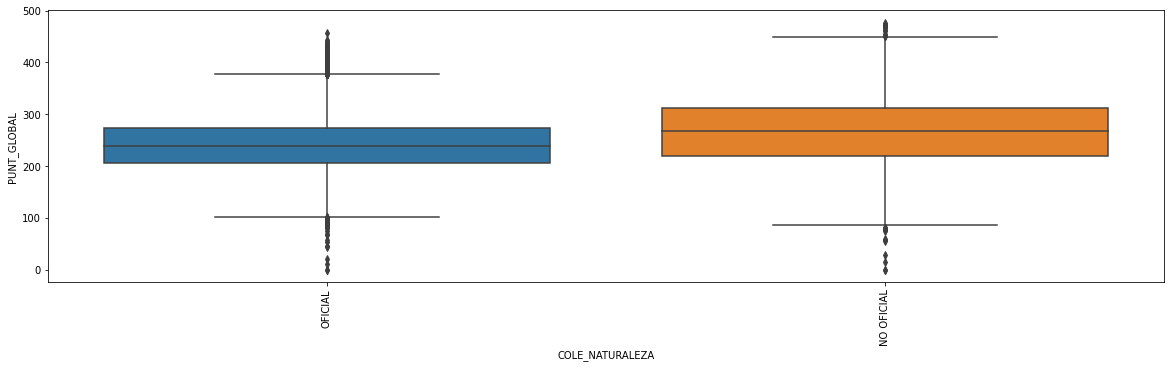

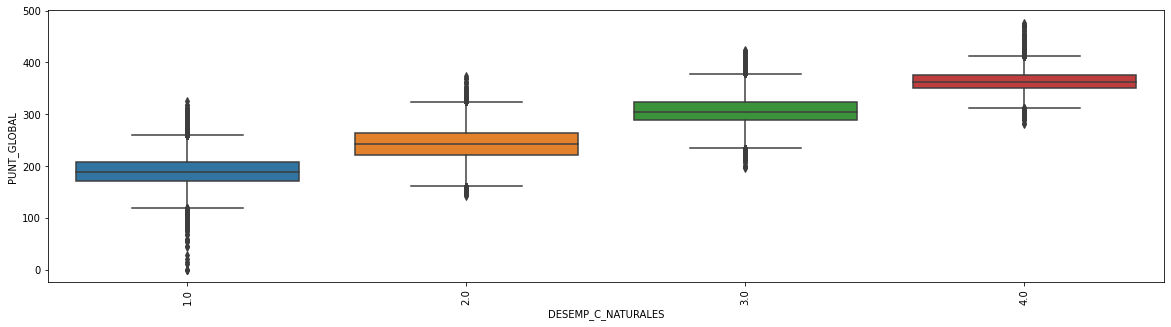

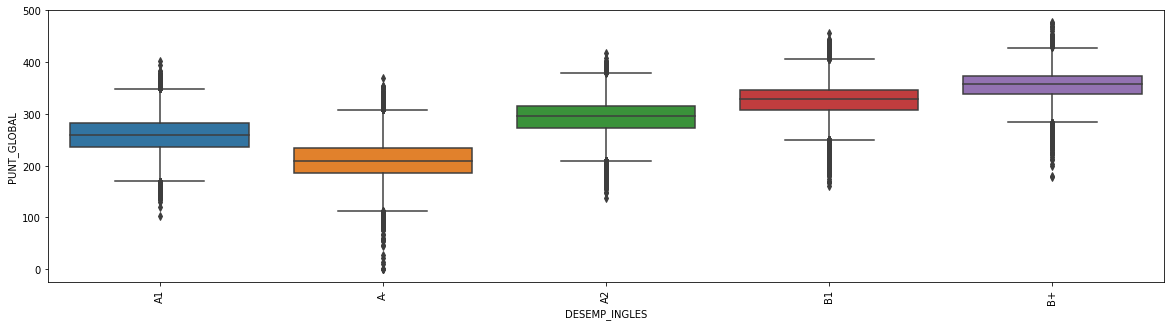

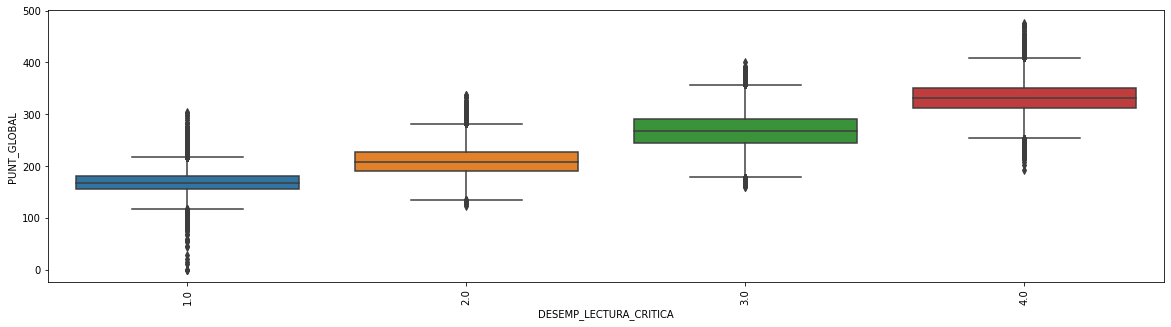

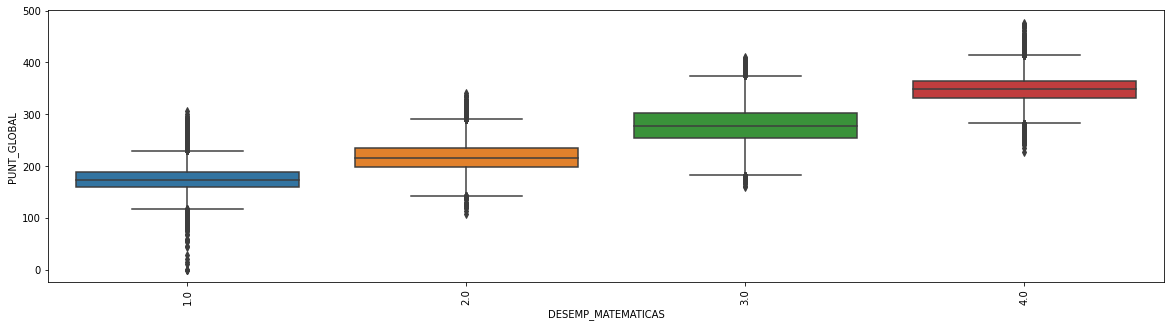

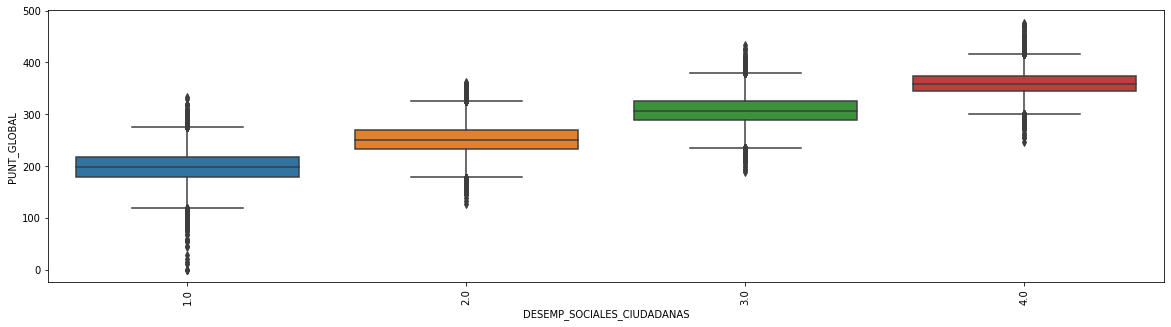

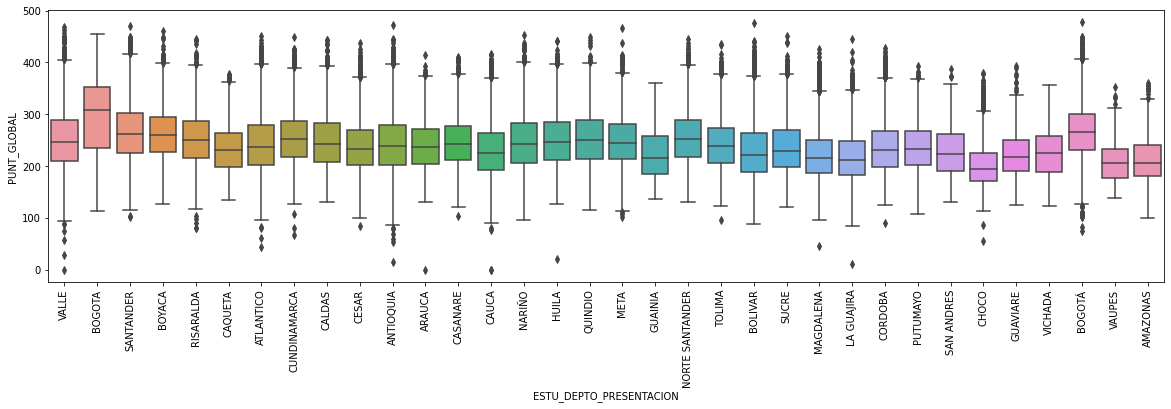

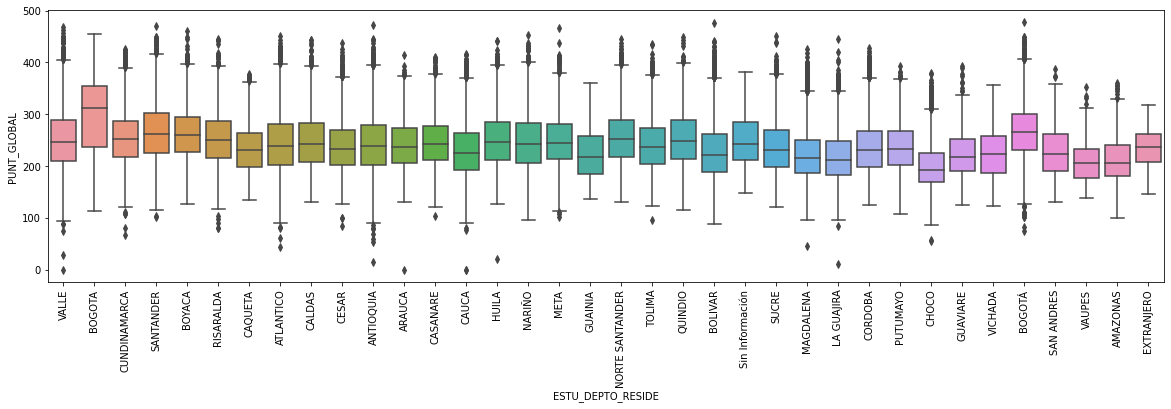

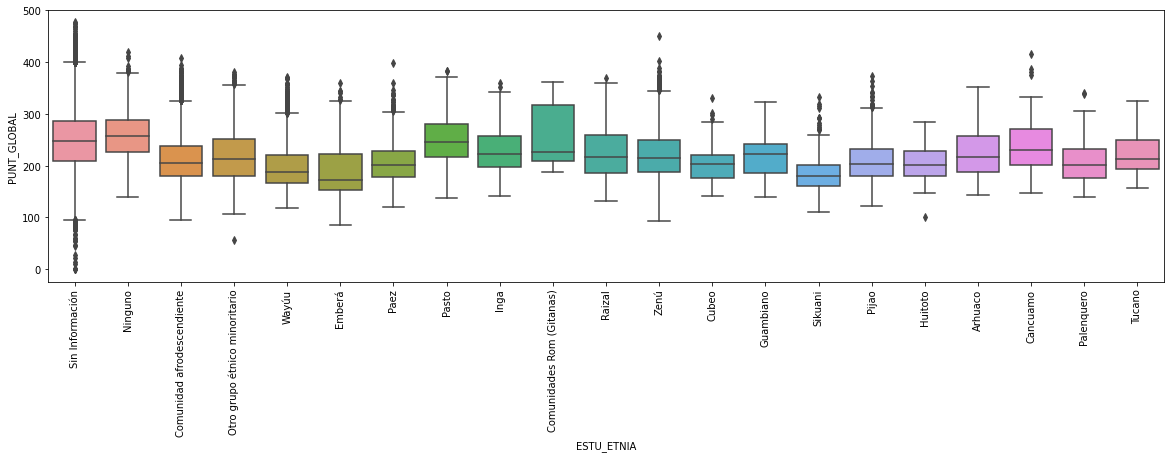

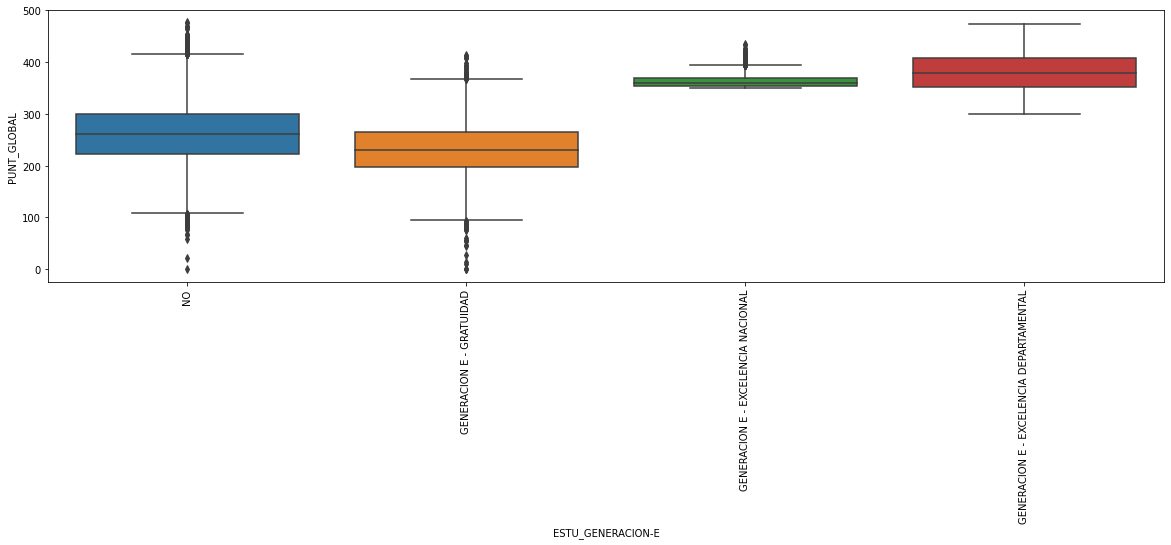

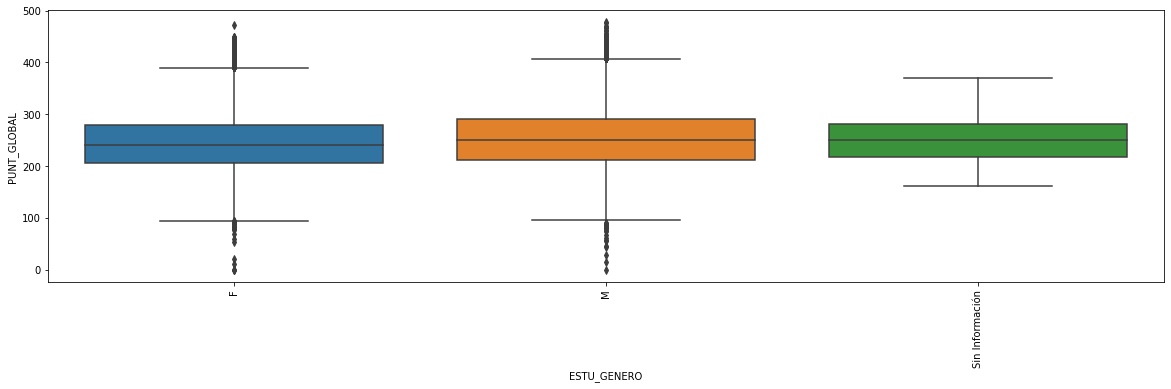

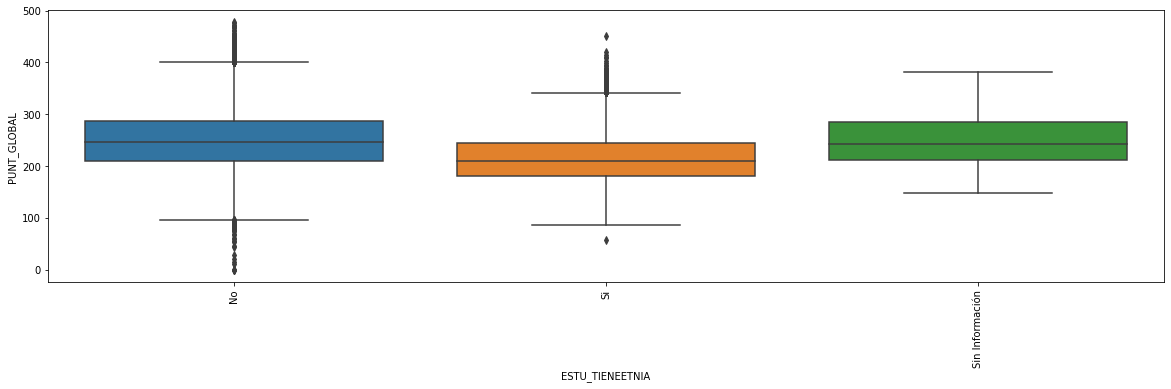

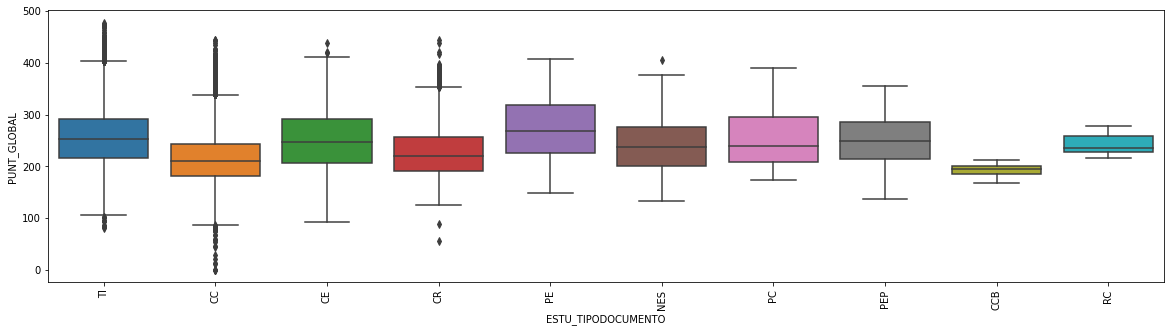

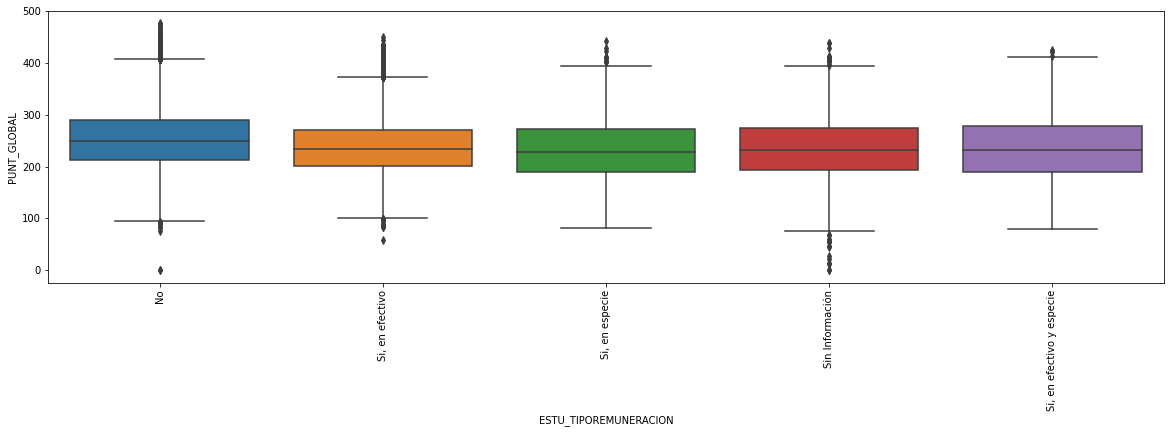

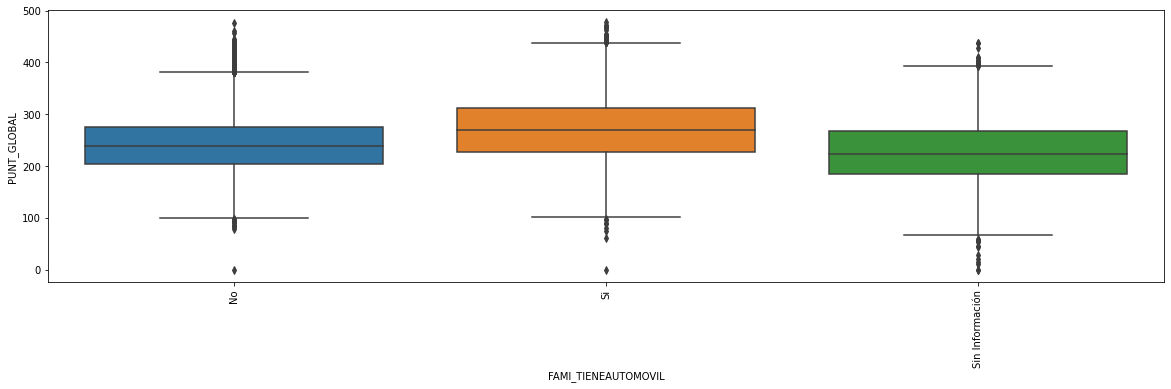

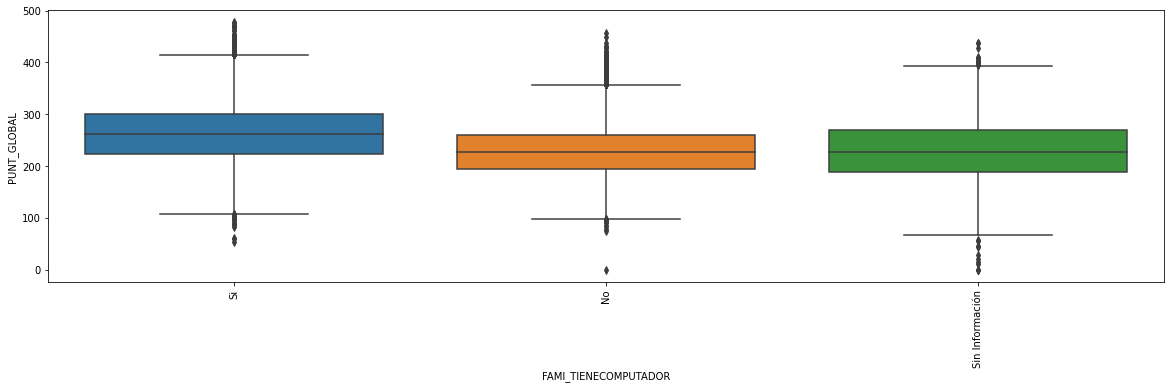

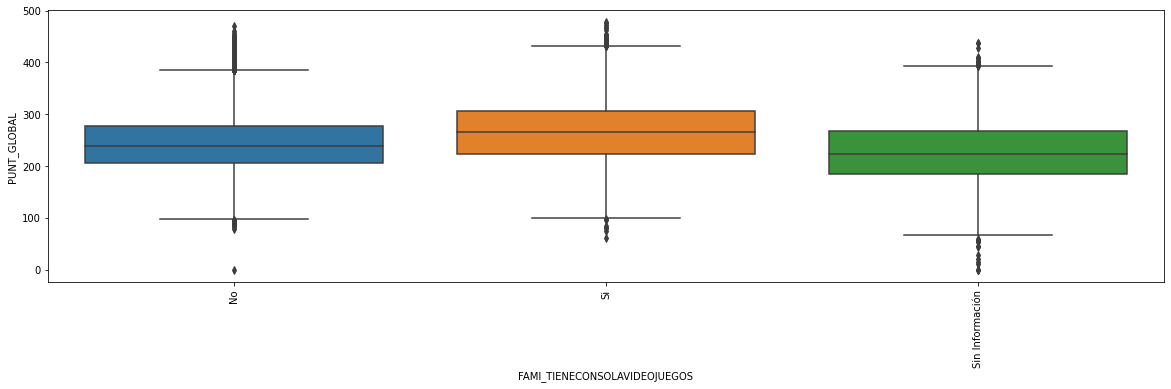

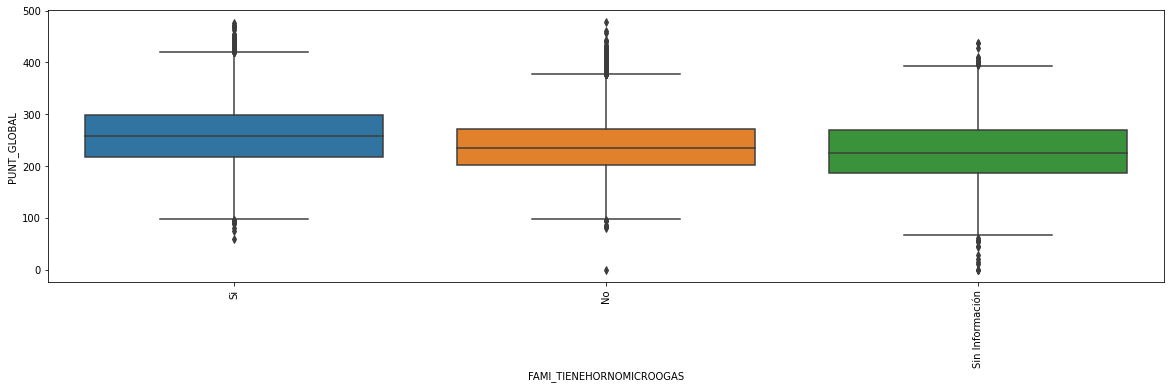

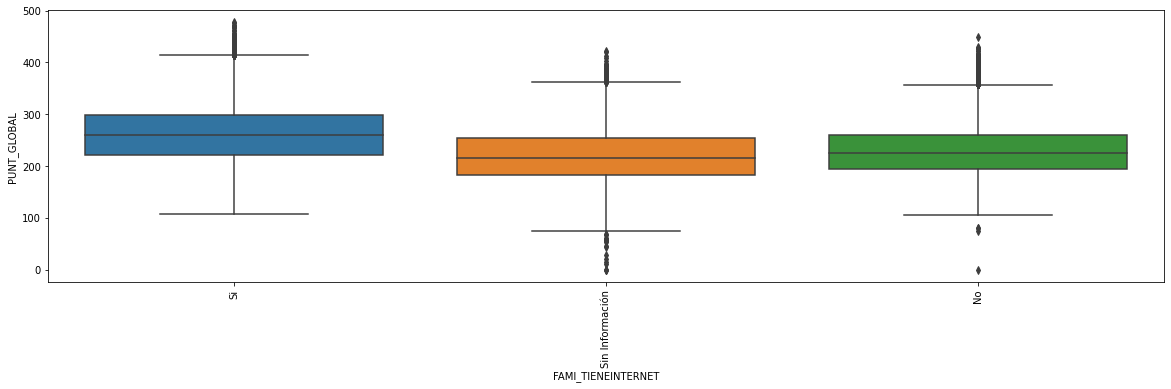

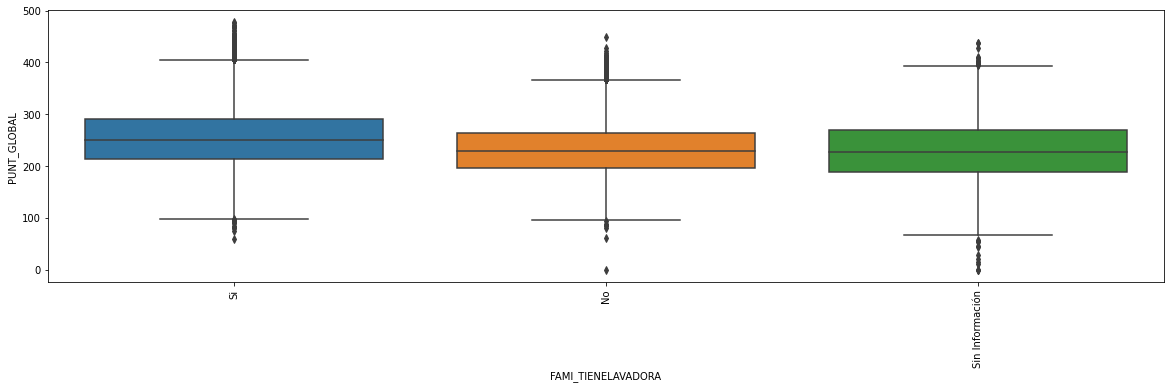

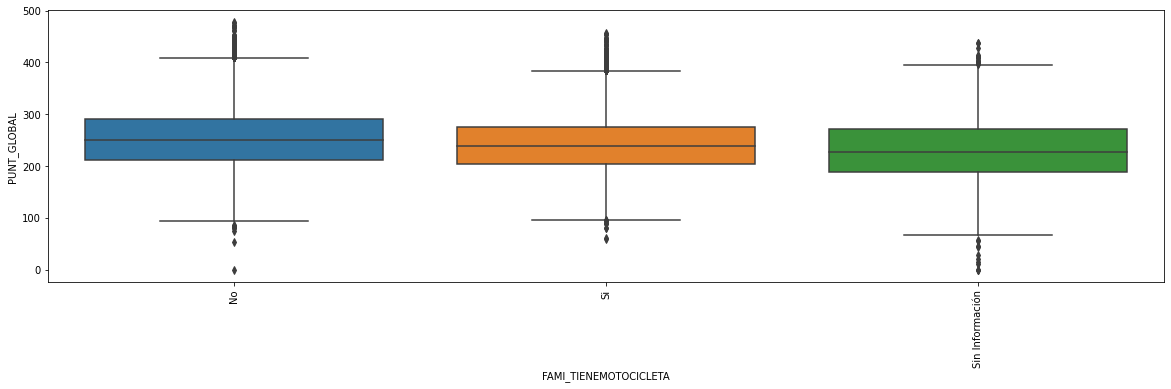

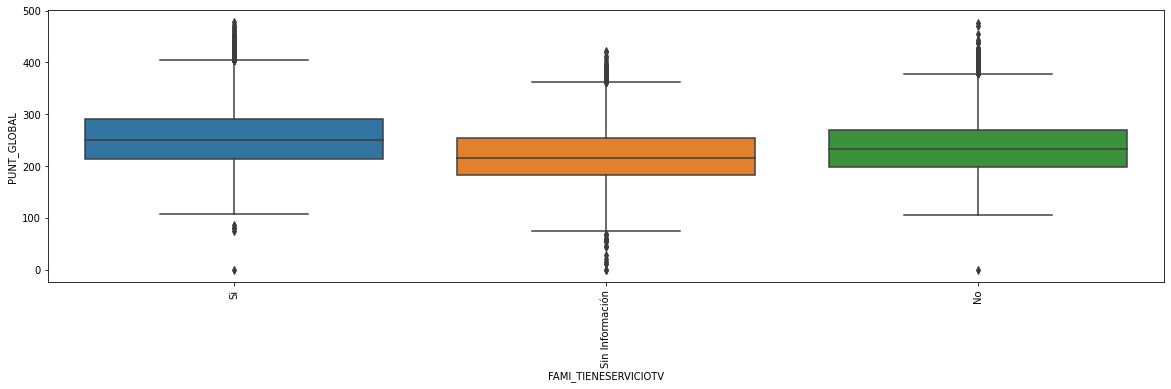

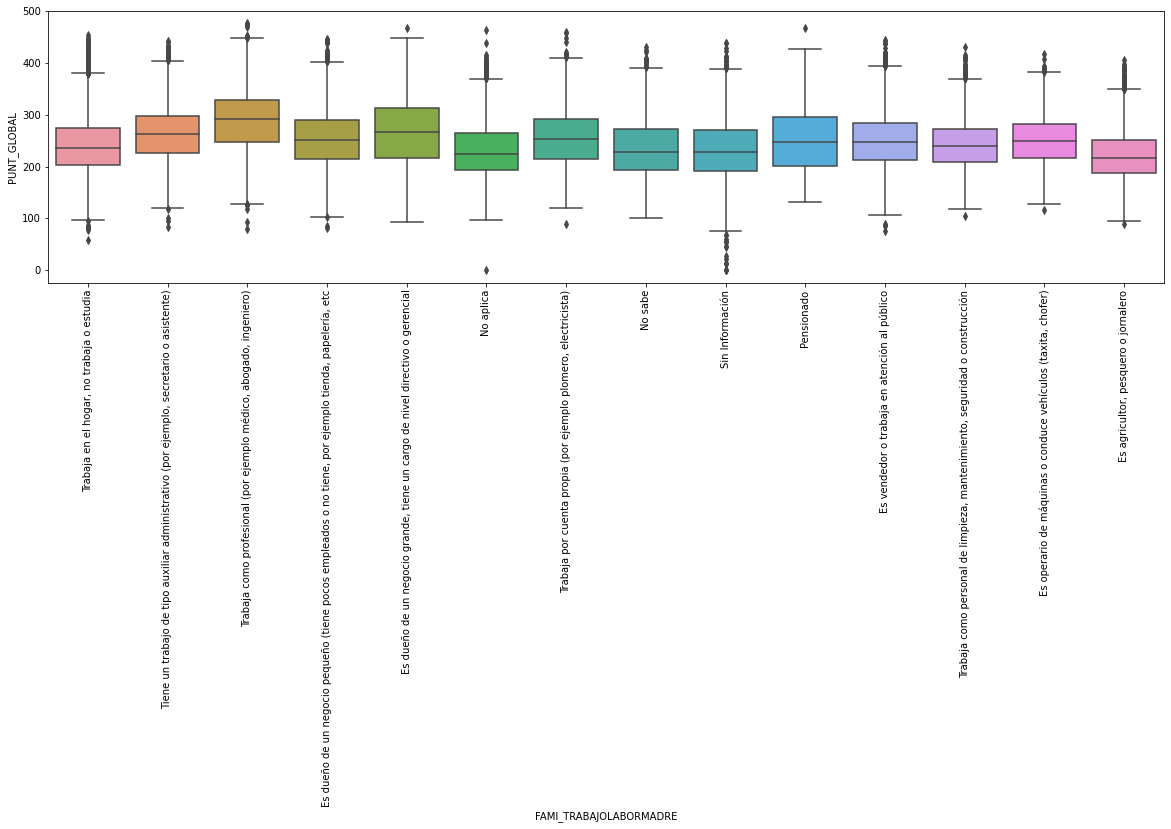

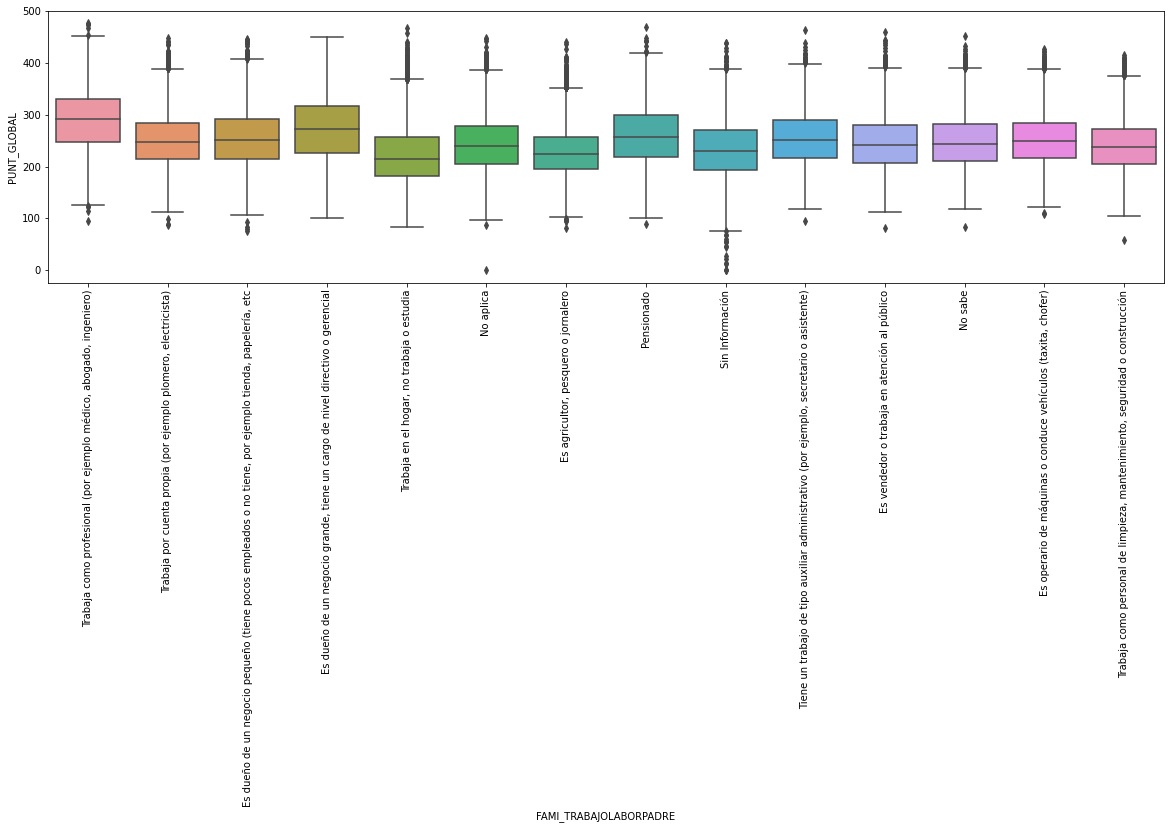

In [ ]:
for i in varcats:
  plt.figure(figsize=(20, 5))
  g=sns.boxplot(x=i,y='PUNT_GLOBAL',data=full5, hue='')
  g.set_xticklabels(g.get_xticklabels(),rotation=90)
  plt.show()

### Reducción definitiva de variables

In [ ]:
# Está pendiente

### Acercamiento INICIAL a la Clusterización

In [ ]:
full5b=pd.get_dummies(full5.iloc[0:5000,:], columns=varcats)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
full5b=ss.fit_transform(full5b)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(full5b)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans.predict(full5b)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X=pca.fit_transform(full5b)

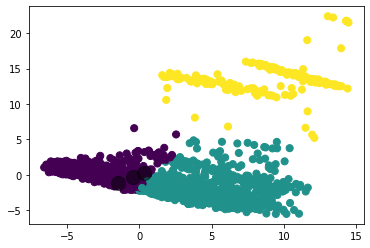

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

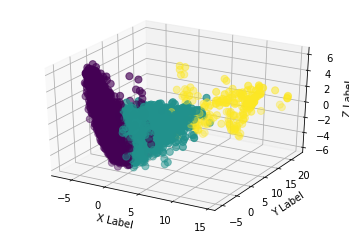

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2] , c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

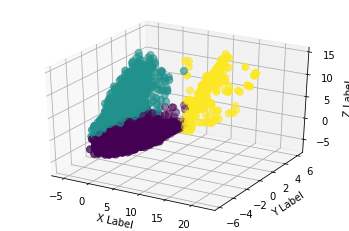

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 1], X[:, 2], X[:, 0] , c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

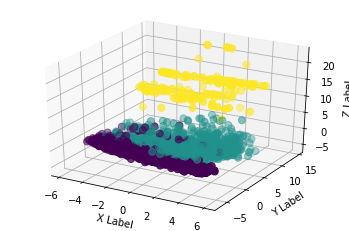

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 2], X[:, 0], X[:, 1] , c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()